In [252]:
from functions import *
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
from sklearn import svm
from sklearn.model_selection import cross_val_score
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
from scipy import stats
from sklearn.metrics import roc_curve
from functions import *
import chart_studio.plotly as py
import plotly.figure_factory as ff
from ModelRunner import ModelRunner
import ModelRunner
import importlib
import functions
importlib.reload(functions)
from functions import *
importlib.reload(ModelRunner)
from ModelRunner import ModelRunner
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from numpy import mean, std
import category_encoders as ce
# from functions import *
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go
# from IPython.display import Markdown as md
# from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [253]:

import seaborn as sns
from IPython.display import HTML
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks") ## show the above plot
import matplotlib_inline
from IPython.display import set_matplotlib_formats
matplotlib_inline.backend_inline.set_matplotlib_formats('retina') #Set Matplotlib rendering resolution
matplotlib.rcParams["figure.dpi"] = 100 # for rendering higher resolution


# from plotly.offline import iplot, init_notebook_mode
# init_notebook_mode(connected=True)


from plotly.offline import init_notebook_mode, iplot, plot
import plotly.offline as py
py.init_notebook_mode(connected=True)
# import plotly.io as pio
# pio.renderers.default = "browser"


In [254]:

art_file = r'C:\Users\darie\OneDrive - nyu.edu\Intro To DS\Capstone\Data\theArt.csv'
data_file = r'C:\Users\darie\OneDrive - nyu.edu\Intro To DS\Capstone\Data\theData.csv'

art = pd.read_csv(art_file)
ratings = pd.read_csv(data_file)

art_cols = art.columns
store_means = {}

##DataFrames of artworks by type
classical_art = art.loc[art[art_cols[5]] == 1]
modern_art = art.loc[art[art_cols[5]] == 2]
nonhuman_art = art.loc[art[art_cols[5]] == 3]

# Dataframes of artwork ratings by artwork type
classic_data = ratings.iloc[:, :35]
modern_data = ratings.iloc[:, 35:70]
nonhuman_data = ratings.iloc[:, 70:91]

# Q1 Means of artworks by type
classic_mean = classic_data.mean(axis=0).mean()
modern_mean = modern_data.mean(axis=0).mean()
nonhuman_mean = nonhuman_data.mean(axis=0).mean()

energy_data = ratings.iloc[:, 91:182]
ratings_data = ratings.iloc[:, :91]

ratings1 = ratings.iloc[:,:91]
energy = ratings.iloc[:,91:182]
dark = ratings.iloc[:,182:194] #PCA
action = ratings.iloc[:,194:205] #PCA
esteem = ratings.iloc[:,205:215] #PCA
demographics = ratings[['19','2.45','0','3.24','2.46','2.47']]




wd = ratings.loc[ratings['2.45'] == 1].iloc[:,:91]#.mean(axis=1)
md = ratings.loc[ratings['2.45'] == 2].iloc[:,:91]#.mean(axis=1)
woman_mean = ratings.loc[ratings['2.45'] == 1].iloc[:,:91].mean(axis=0).mean()
men_mean = ratings.loc[ratings['2.45'] == 2].iloc[:,:91].mean(axis=0).mean()


# Q3 Mean ratings with and without an art education background


withEdu_mean = ratings.loc[ratings['0'] != 0].iloc[:,:91].mean()
noEdu_mean = ratings.loc[ratings['0'] == 0].iloc[:,:91].mean()
power1, pval1 = stats.mannwhitneyu(x=classic_data.mean(axis=0), y=modern_data.mean(axis=0), alternative = 'greater')
power2, pval2 = stats.mannwhitneyu(x=modern_data.mean(axis=0), y=nonhuman_data.mean(axis=0), alternative = 'greater')

power3, pval3 = stats.mannwhitneyu(x=md.mean(axis=0), y=wd.mean(axis=0), alternative = 'greater')
power4, pval4 = stats.mannwhitneyu(x=withEdu_mean, y=noEdu_mean, alternative = 'greater')

uscore_pval = pd.DataFrame([{'u-score':power1,'p-value':str(pval1),'Group 1 Average':classic_mean, 'Group 2 Average':modern_mean},
              {'u-score':power2,'p-value':str(pval2),'Group 1 Average':modern_mean, 'Group 2 Average':nonhuman_mean},
              {'u-score':power3,'p-value':str(pval3),'Group 1 Average':men_mean, 'Group 2 Average':woman_mean},
            {'u-score':power4,'p-value':str(pval4),'Group 1 Average':withEdu_mean.mean(), 'Group 2 Average':noEdu_mean.mean()}
              ])
uscore_pval_names = pd.DataFrame(['Classic v. Modern','Modern v. Non-Human','Men v. Women','With Art v. Without Art Edu'])
uscore_pval_df = pd.concat([uscore_pval_names,uscore_pval],axis=1)
print(wd.mean(axis=0).describe())
print(md.mean(axis=0).describe())
display(uscore_pval_df)

count   91.00
mean     4.21
std      0.72
min      2.46
25%      3.82
50%      4.29
75%      4.72
max      5.62
dtype: float64
count   91.00
mean     4.23
std      0.83
min      2.28
25%      3.75
50%      4.31
75%      4.74
max      5.98
dtype: float64


,0,u-score,p-value,Group 1 Average,Group 2 Average
0,Classic v. Modern,891.50,0.0005350258162413517,4.74,4.26
1,Modern v. Non-Human,644.50,1.4358021617813987e-06,4.26,3.31
2,Men v. Women,4192.00,0.4429416449781828,4.23,4.21
3,With Art v. Without Art Edu,3761.00,0.8575406189479926,4.19,4.31


In [255]:
men_women_means = pd.concat([ratings_data.mean(axis=1), ratings['2.45']],axis=1).rename(columns={0:'Men/Women Mean Preference Ratings','2.45':'Gender'}).dropna()
men_women_means = men_women_means[men_women_means.Gender != 3]
men_women_means['Gender'].value_counts()

2.00    178
1.00     95
Name: Gender, dtype: int64

In [256]:
x0 = classic_data.to_numpy()
stacked_classic = np.stack(x0,axis=0).reshape(-1,1)
x1 = modern_data.to_numpy()
stacked_modern = np.stack(x1,axis=0).reshape(-1,1)

energy_means = ratings.iloc[:, 91:182].mean(axis=0).values.reshape(-1, 1)
ratings_means = ratings.iloc[:, :91].mean(axis=0).values.reshape(-1, 1)
data = np.column_stack((ratings_means, ratings_means))
data = pd.DataFrame(data)
data.columns = ["energy_means", "rating_means"]
data['actual_art_type'] = art.iloc[:, 5]
fig1 = makeBoxPlot(data, "actual_art_type", "rating_means","Artwork Rating Distribution by Art Types")
fig1.show()

In [257]:

store_means['Q1 Means of Artworks by Type'] = {'Classic Mean': classic_mean, 'Modern Mean': modern_mean,
                                               'Non-Human Mean': nonhuman_mean}
# Q2 Mean ratings by men and women respectively
wd = ratings[ratings.iloc[:, [216]] == 1]
woman_mean = ratings.loc[ratings['2.45'] == 1].mean(axis=0).mean()
men_mean = ratings.loc[ratings['2.45'] == 2].mean(axis=0).mean()
store_means['Mean Ratings by Men and Women Respectively'] = {'Mean Ratings by Women': woman_mean,
                                                             'Mean Ratings by Men': men_mean}

# Q3 Mean ratings with and without an art education background
noEdu_mean = ratings.loc[ratings['0'] == 0].mean(axis=0).mean()
withEdu_mean = ratings.loc[ratings['0'] != 0].mean(axis=0).mean()
noEdu_withEdu = {'Without Education mean': noEdu_mean, 'With Education mean': withEdu_mean}
store_means['Q2 Mean Ratings With and Without an Art Education Background'] = {'Without an Art Education Mean': noEdu_mean, 'With some form of Art Education Mean': withEdu_mean}
# g = pd.DataFrame.from_dict(store_means, orient='index' )
# pd.DataFrame(g)

In [258]:

energy_data = ratings.iloc[:, 91:182]
ratings_data = ratings.iloc[:, :91]
energy_flattened = energy_data.values.reshape(-1,1)
ratings_flattened = ratings_data.values.reshape(-1,1)
energy_means = energy_data.mean(axis=0).values.reshape(-1, 1)
ratings_means = ratings_data.mean(axis=0).values.reshape(-1, 1)
energy_means_rows = energy_data.transpose().mean(axis=0).values.reshape(-1, 1)
ratings_means_rows = ratings_data.transpose().mean(axis=0).values.reshape(-1, 1)


In [259]:
# %%Q5 predicting rating MEANS from all energy scores
# modelRunner = ModelRunner()
# X = energy_data.mean(axis=1).values.reshape(-1,1)  # Set energy data as predictors
# y = ratings_data.mean(axis=1).values.reshape(-1,1) #Set dependent variable to artwork rating means
# modelRunner.regressionEval(X,y, 'Q5_regression-rating means-and-energy', 'predicting rating MEANS from 1d energy')
# modelRunner.regressionEval(energy_data,ratings_means_rows, 'Q5_regression-EnergyAll-and-rating-means', 'predicting rating MEANS from all energy ')
# modelRunner.regressionEval(energy_means,ratings_means, 'Q5_regression-rating-and-energy-means', 'predicting rating MEANS from 1d energy means')
# modelRunner.regressionEval(energy_means_rows,ratings_means_rows, 'Q5_regression-rating-and-energy-means-per-individual', 'predicting rating MEANS of each individual from their 1d energy means')
# modelRunner.regressionEval(x_values=energy_data.transpose(), y_values= ratings_data.transpose(), normalize_=False,model_name='Q5_regression-AllData',description='predicting all ratings from energy scores matrix without normalization')
# modelRunner.regressionEval(x_values=energy_means, y_values= ratings_means, normalize_=True,model_name= 'Q5_regression-AllData-NORMALIZED',                      description='predicting all ratings from energy scores matrix with Normalized features')
# modelRunner.regressionEval(x_values=energy_flattened, y_values= ratings_flattened, normalize_=False,model_name= 'Q5_regression-AllData-Flanttened',
# description='predicting all ratings from energy scores Flattened')

# modelRunner.displayResults()


Model Name,id,r2,MAE,MSE,RMSE,Accuracy,description
Q5_regression-rating means-and-energy,1,0.16,0.48,0.43,0.65,16.05%,predicting rating MEANS from 1d energy
Q5_regression-EnergyAll-and-rating-means,2,-0.28,0.62,0.65,0.81,-28.44%,predicting rating MEANS from all energy
Q5_regression-rating-and-energy-means,3,0.05,0.57,0.58,0.76,4.89%,predicting rating MEANS from 1d energy means
Q5_regression-rating-and-energy-means-per-individual,4,0.16,0.48,0.43,0.65,16.05%,predicting rating MEANS of each individual from their 1d energy means
Q5_regression-AllData,5,-0.07,1.21,2.37,1.54,-6.97%,predicting all ratings from energy scores matrix without normalization
Q5_regression-AllData-NORMALIZED,6,0.05,0.57,0.58,0.76,4.89%,predicting all ratings from energy scores matrix with Normalized features
Q5_regression-AllData-Flanttened,7,0.00,1.37,2.77,1.66,0.02%,predicting all ratings from energy scores Flattened


### Evaluation using cross_validate scikit-learn algorithm

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_explained_variance
0,-0.73,-1.48,-3.80,-0.70
1,-0.58,-1.56,-3.90,-0.55
2,-0.74,-1.40,-3.35,-0.70
3,-0.56,-1.40,-3.10,-0.54
4,-0.77,-1.49,-3.71,-0.73


Mean  R2                   -0.68
Mean -MAE                  -1.47
Mean -MSE                  -3.57
Mean  Explained Variance   -0.64
dtype: float64

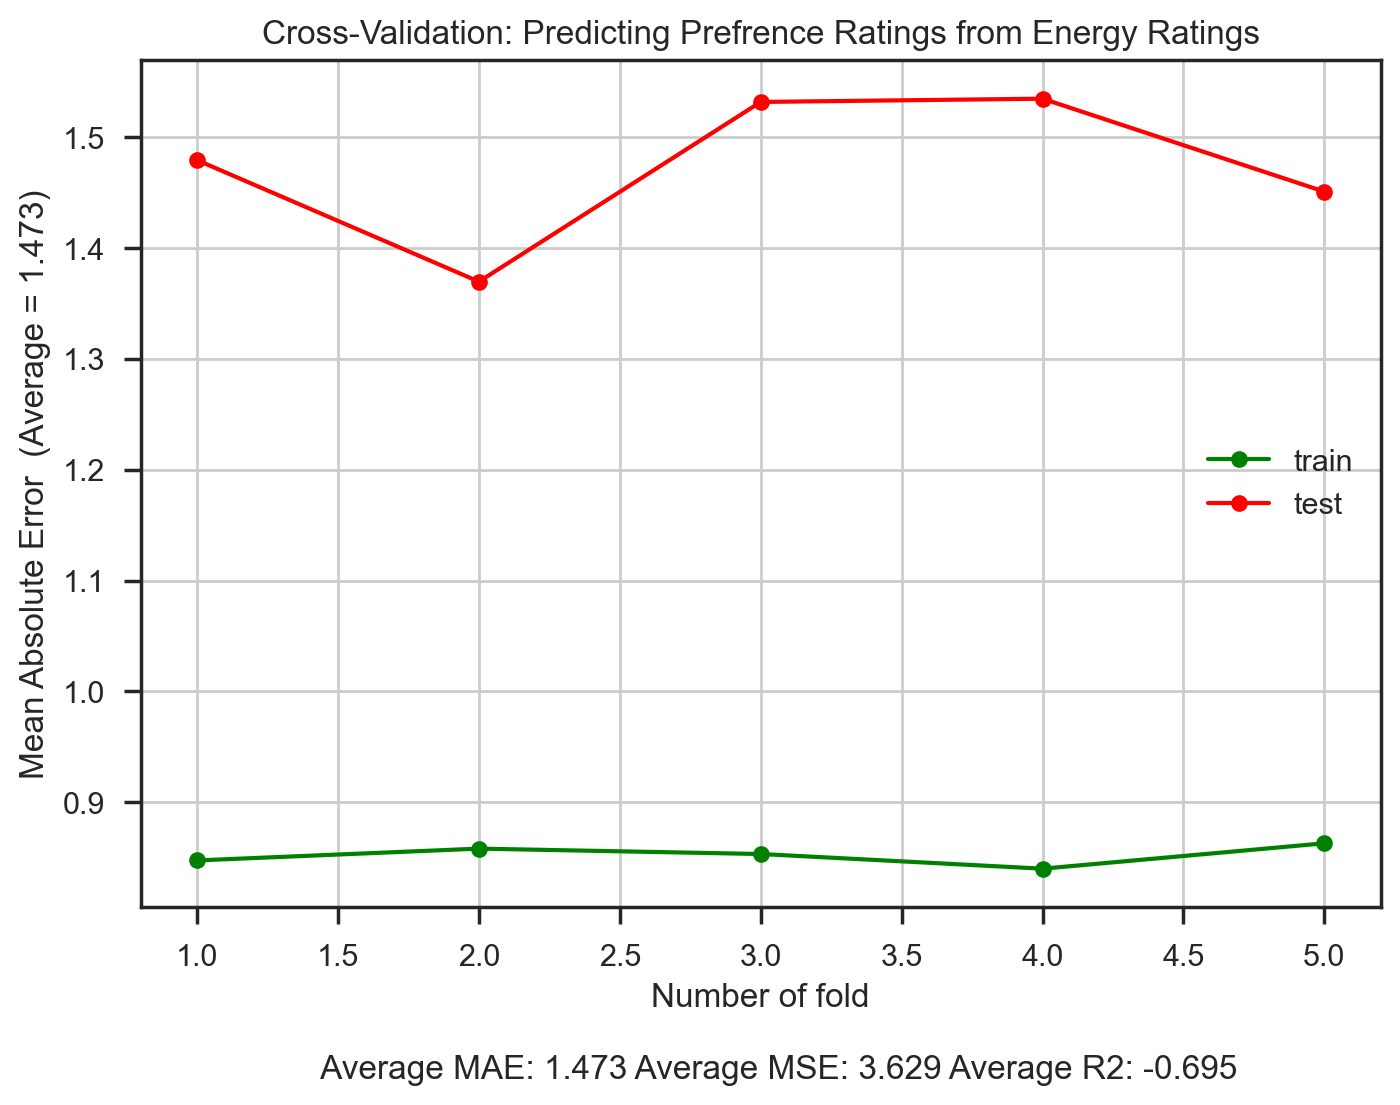

   MAE  MSE  RMSE    R2
0 1.48 3.63  1.91 -0.61
1 1.37 3.09  1.76 -0.57
2 1.53 3.94  1.99 -0.78
3 1.53 4.00  2.00 -0.81
4 1.45 3.47  1.86 -0.70
Average MAE: 1.473 Average MSE: 3.629 Average R2: -0.695


In [260]:
model = LinearRegression()

model = LinearRegression()
cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=14369331)
scoring = ['r2','neg_mean_absolute_error','neg_mean_squared_error','explained_variance']
n_scores = cross_validate(model, energy_data, ratings_data, scoring=scoring, cv=cv)
n_scores.pop('fit_time')
n_scores.pop('score_time')
df = pd.DataFrame.from_dict(n_scores)
display(df)
means = df.mean(axis=0).rename({'test_r2':'Mean  R2','test_neg_mean_absolute_error':'Mean -MAE','test_neg_mean_squared_error':'Mean -MSE','test_explained_variance':'Mean  Explained Variance'})
display(means)
test_model(energy_data,ratings_data, 'Cross-Validation: Predicting Prefrence Ratings from Energy Ratings')


,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_explained_variance
0,-0.08,-0.63,-0.69,0.08
1,0.09,-0.59,-0.52,0.17
2,-0.18,-0.55,-0.46,-0.18
3,0.22,-0.67,-0.64,0.25
4,0.10,-0.48,-0.41,0.10


Mean  R2                    0.03
Mean -MAE                  -0.58
Mean -MSE                  -0.55
Mean  Explained Variance    0.09
dtype: float64

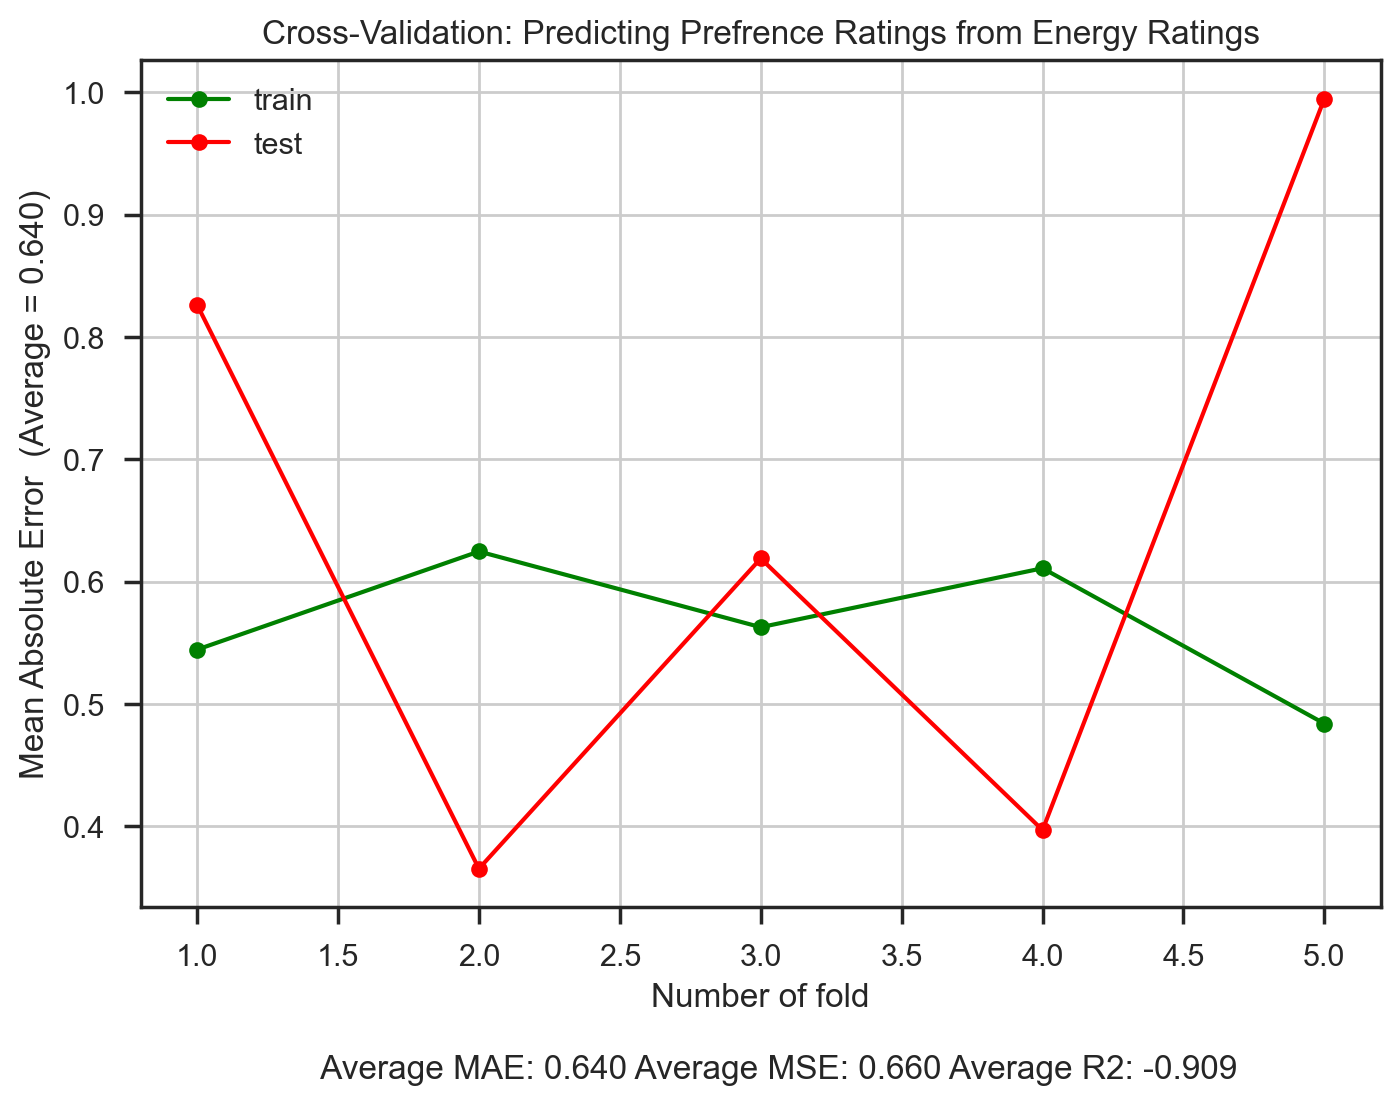

   MAE  MSE  RMSE    R2
0 0.83 0.90  0.95 -1.79
1 0.37 0.21  0.46  0.11
2 0.62 0.63  0.80 -0.65
3 0.40 0.34  0.58  0.10
4 0.99 1.23  1.11 -2.32
Average MAE: 0.640 Average MSE: 0.660 Average R2: -0.909


In [261]:
cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=14369331)
scoring = ['r2','neg_mean_absolute_error','neg_mean_squared_error','explained_variance']
n_scores = cross_validate(model, energy_means, ratings_means, scoring=scoring, cv=cv)
n_scores.pop('fit_time')
n_scores.pop('score_time')

df = pd.DataFrame.from_dict(n_scores)
display(df)
means = df.mean(axis=0).rename({'test_r2':'Mean  R2','test_neg_mean_absolute_error':'Mean -MAE','test_neg_mean_squared_error':'Mean -MSE','test_explained_variance':'Mean  Explained Variance'})
display(means)
test_model( energy_means, ratings_means, 'Cross-Validation: Predicting Prefrence Ratings from Energy Ratings')

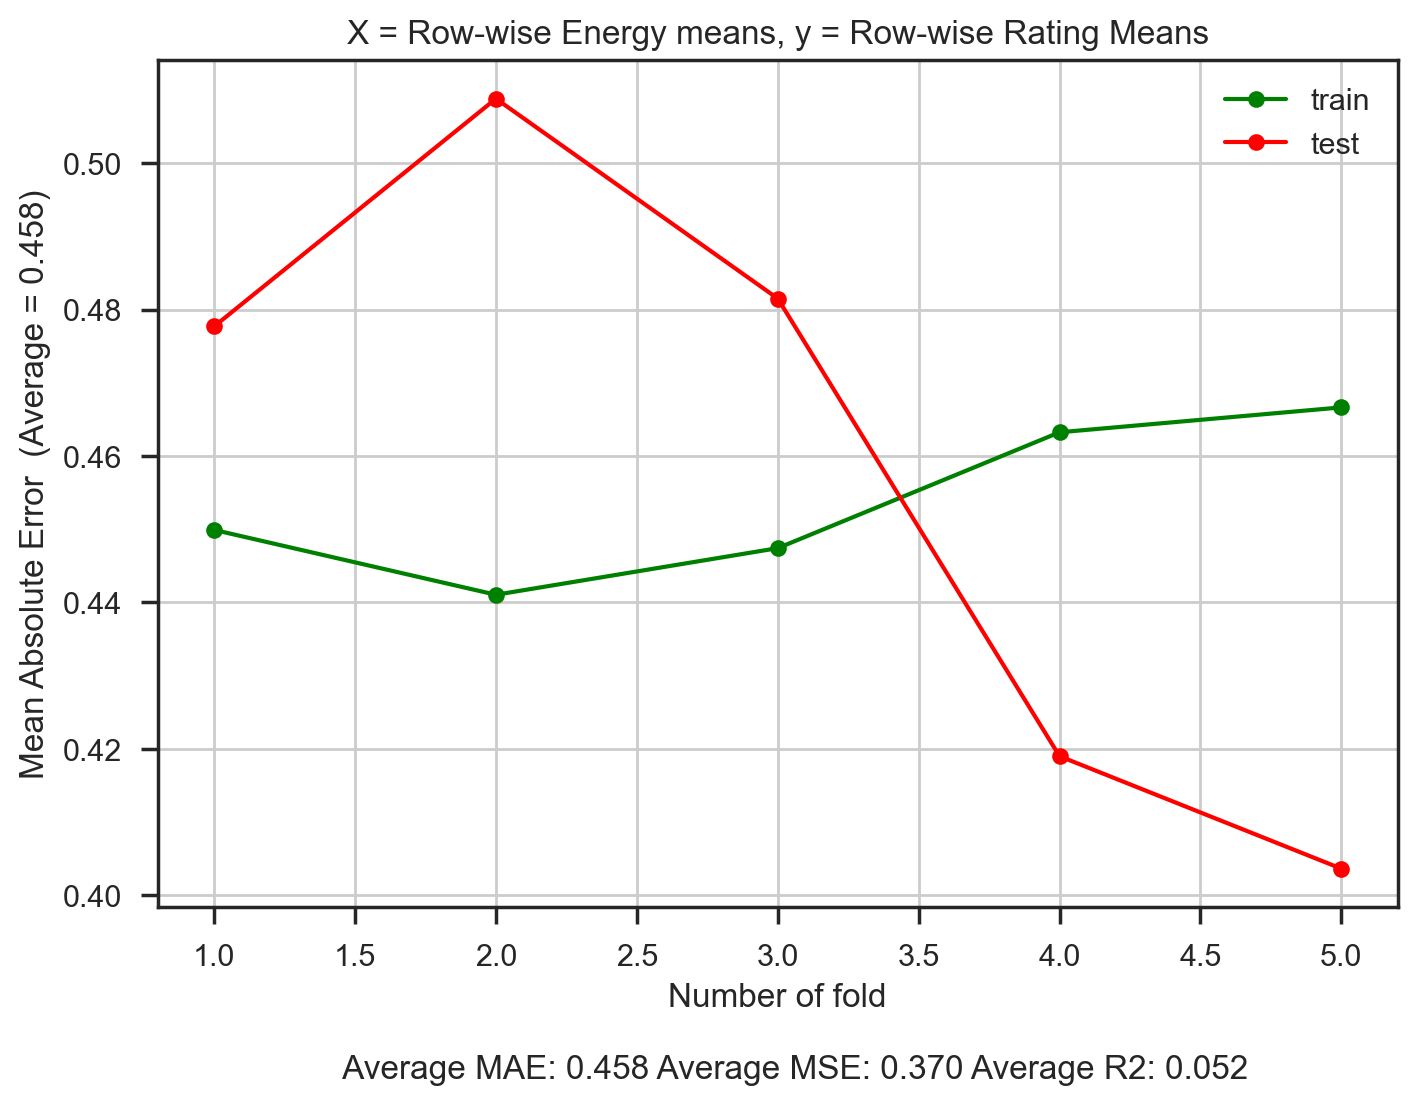

   MAE  MSE  RMSE    R2
0 0.48 0.42  0.65  0.21
1 0.51 0.45  0.67 -0.12
2 0.48 0.41  0.64 -0.02
3 0.42 0.26  0.51  0.06
4 0.40 0.30  0.55  0.13
Average MAE: 0.458 Average MSE: 0.370 Average R2: 0.052


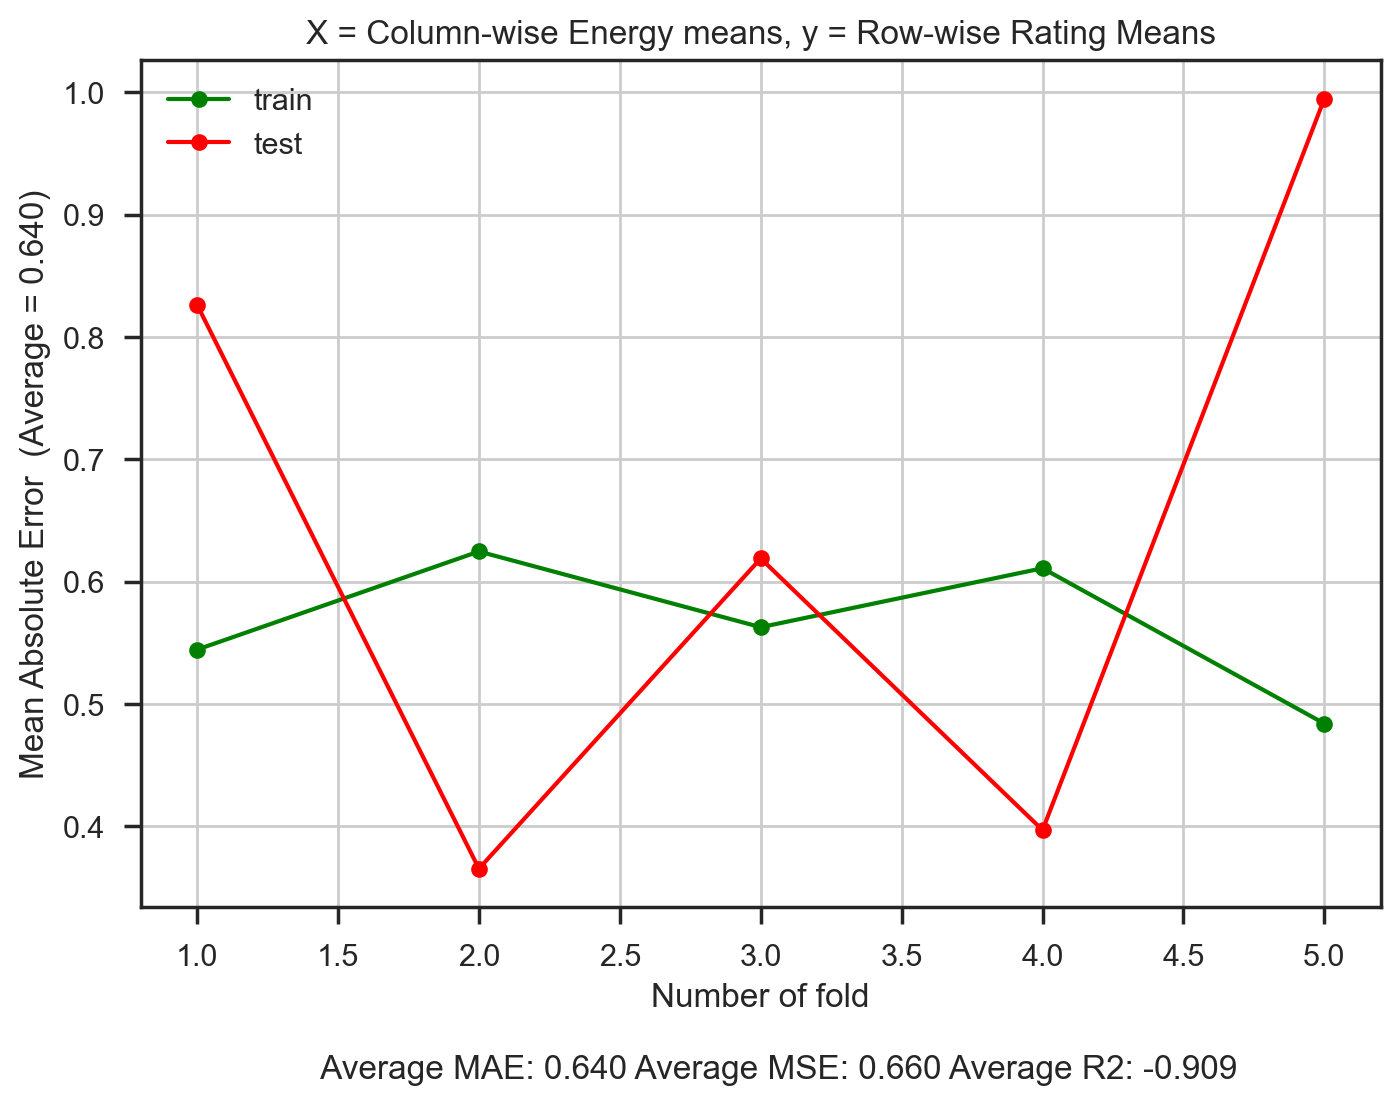

   MAE  MSE  RMSE    R2
0 0.83 0.90  0.95 -1.79
1 0.37 0.21  0.46  0.11
2 0.62 0.63  0.80 -0.65
3 0.40 0.34  0.58  0.10
4 0.99 1.23  1.11 -2.32
Average MAE: 0.640 Average MSE: 0.660 Average R2: -0.909


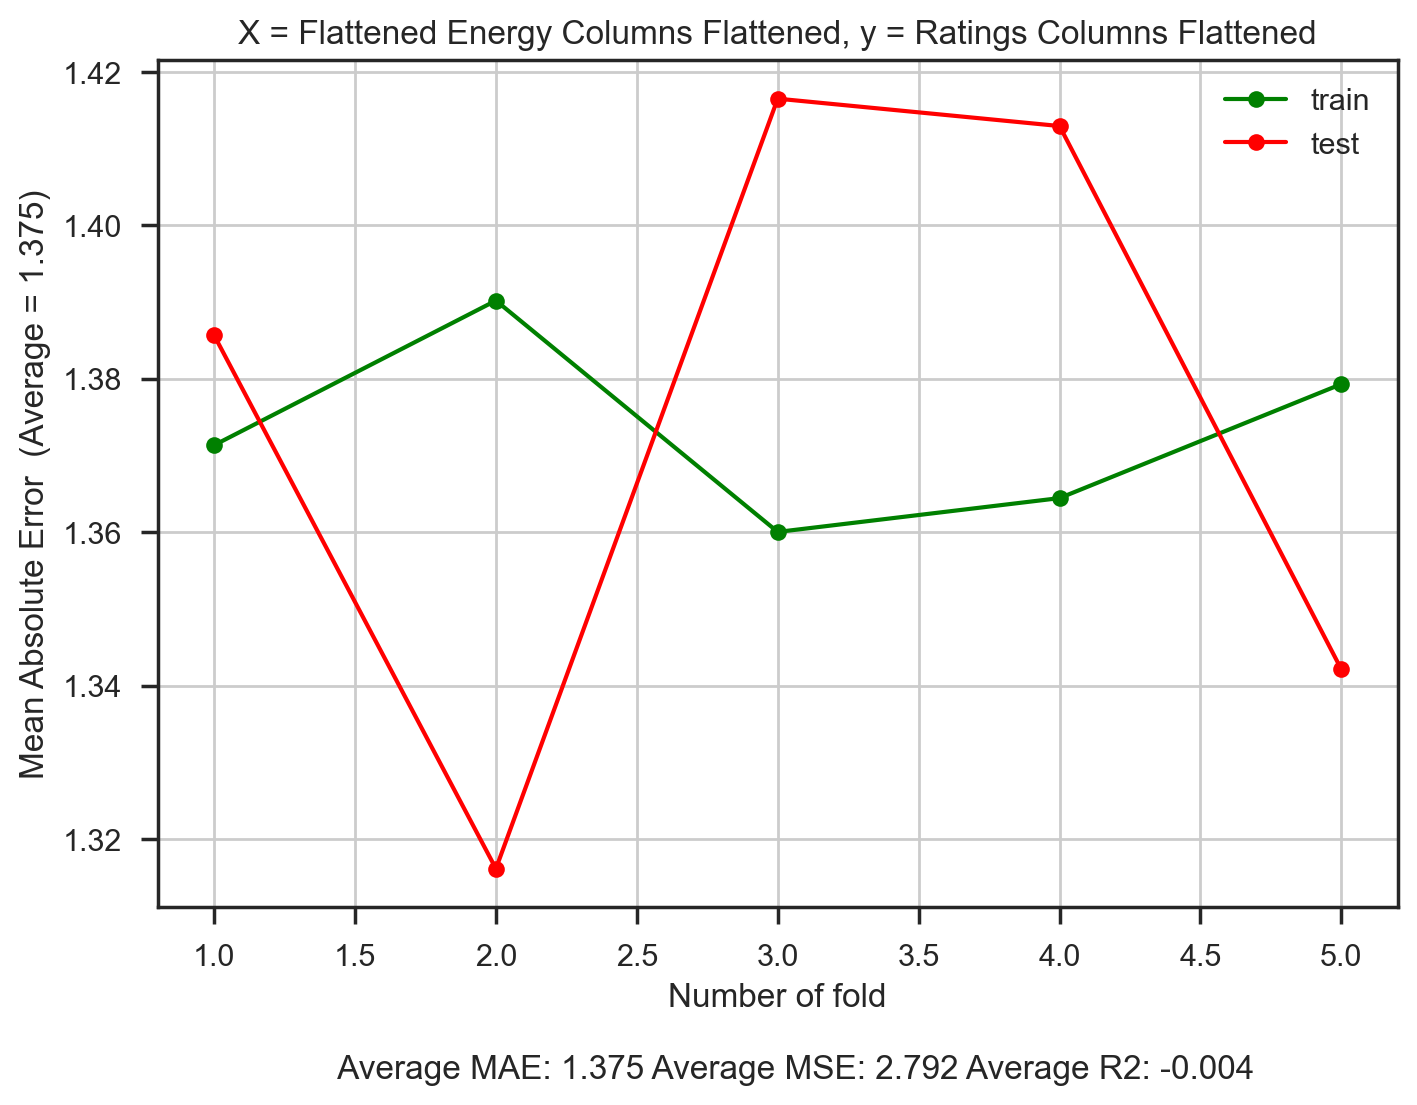

   MAE  MSE  RMSE    R2
0 1.39 2.86  1.69 -0.01
1 1.32 2.60  1.61 -0.00
2 1.42 2.92  1.71 -0.01
3 1.41 2.89  1.70 -0.00
4 1.34 2.69  1.64 -0.00
Average MAE: 1.375 Average MSE: 2.792 Average R2: -0.004


In [262]:
# test_model(energy_data, ratings_data, 'X = All Energy Columns y = All Ratings Columns')
# test_model(energy_data.transpose(), ratings_means, 'X = All Energy Columns, y = Column-wise Rating Means') #X = Energy Data, y = mean Rat
test_model(energy_means_rows, ratings_means_rows, 'X = Row-wise Energy means, y = Row-wise Rating Means')
test_model(energy_means, ratings_means, 'X = Column-wise Energy means, y = Row-wise Rating Means') # X=energy means, y = mean ratings
test_model(energy_flattened, ratings_flattened, 'X = Flattened Energy Columns Flattened, y = Ratings Columns Flattened')

(63, 1) (28, 1) (63, 1) (28, 1)
Accuracy: 0.049
R2: 0.049 MSE:0.582 RMSE: 0.763
Coefficients: 
 [[-0.68547322]]


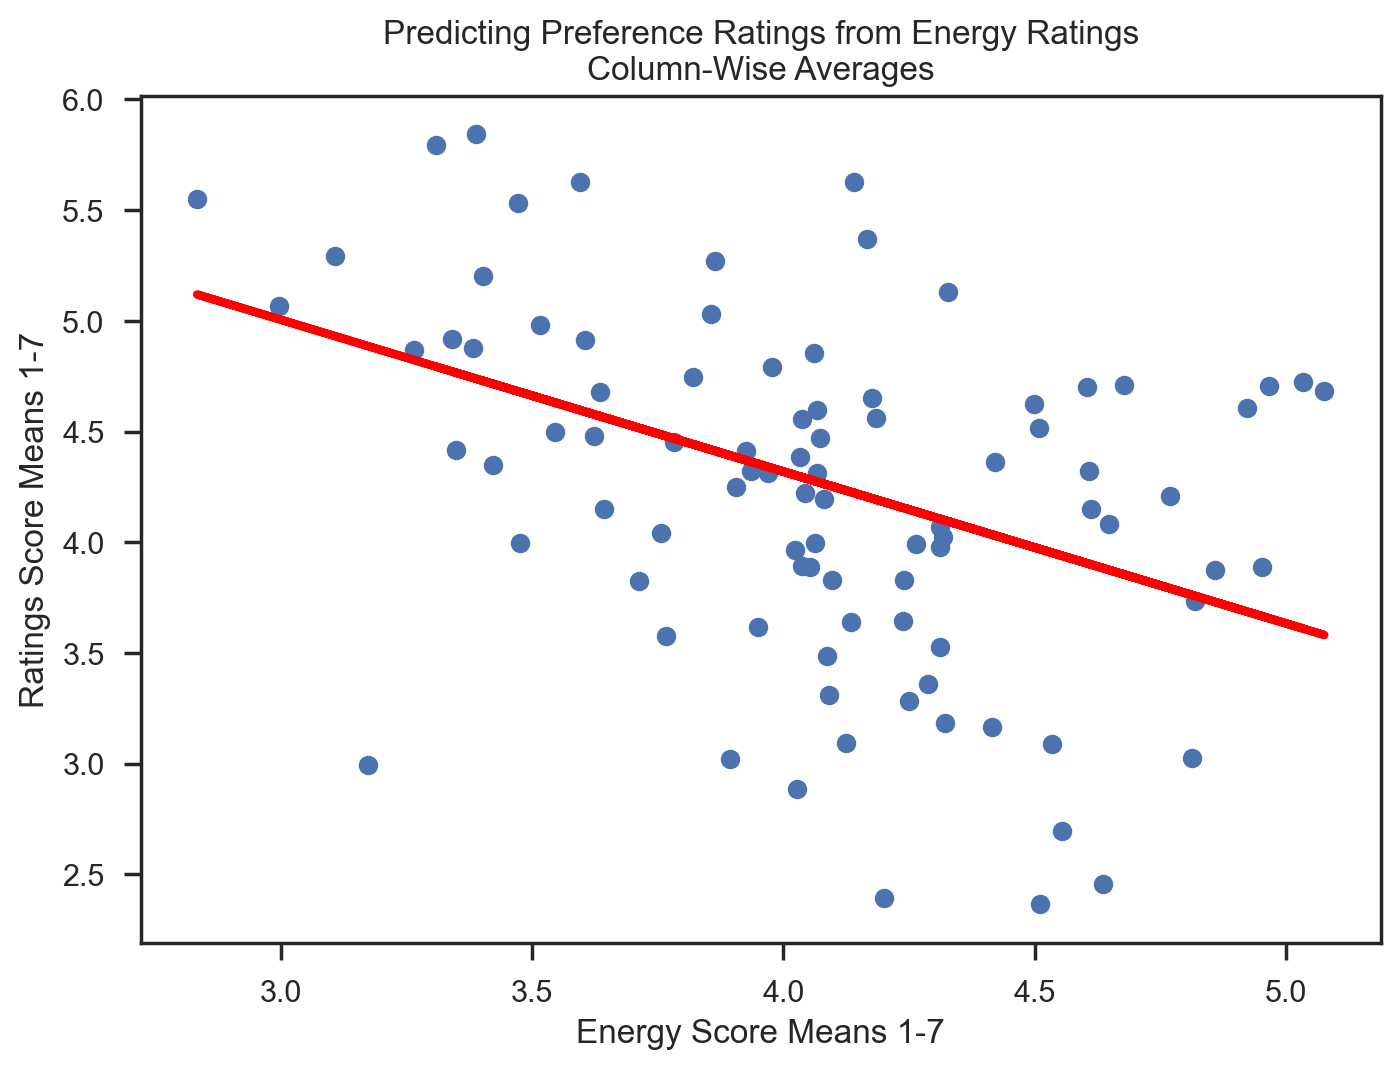

(209, 1) (90, 1) (209, 1) (90, 1)
Accuracy: 0.160
R2: 0.160 MSE:0.425 RMSE: 0.652
Coefficients: 
 [[0.24387692]]


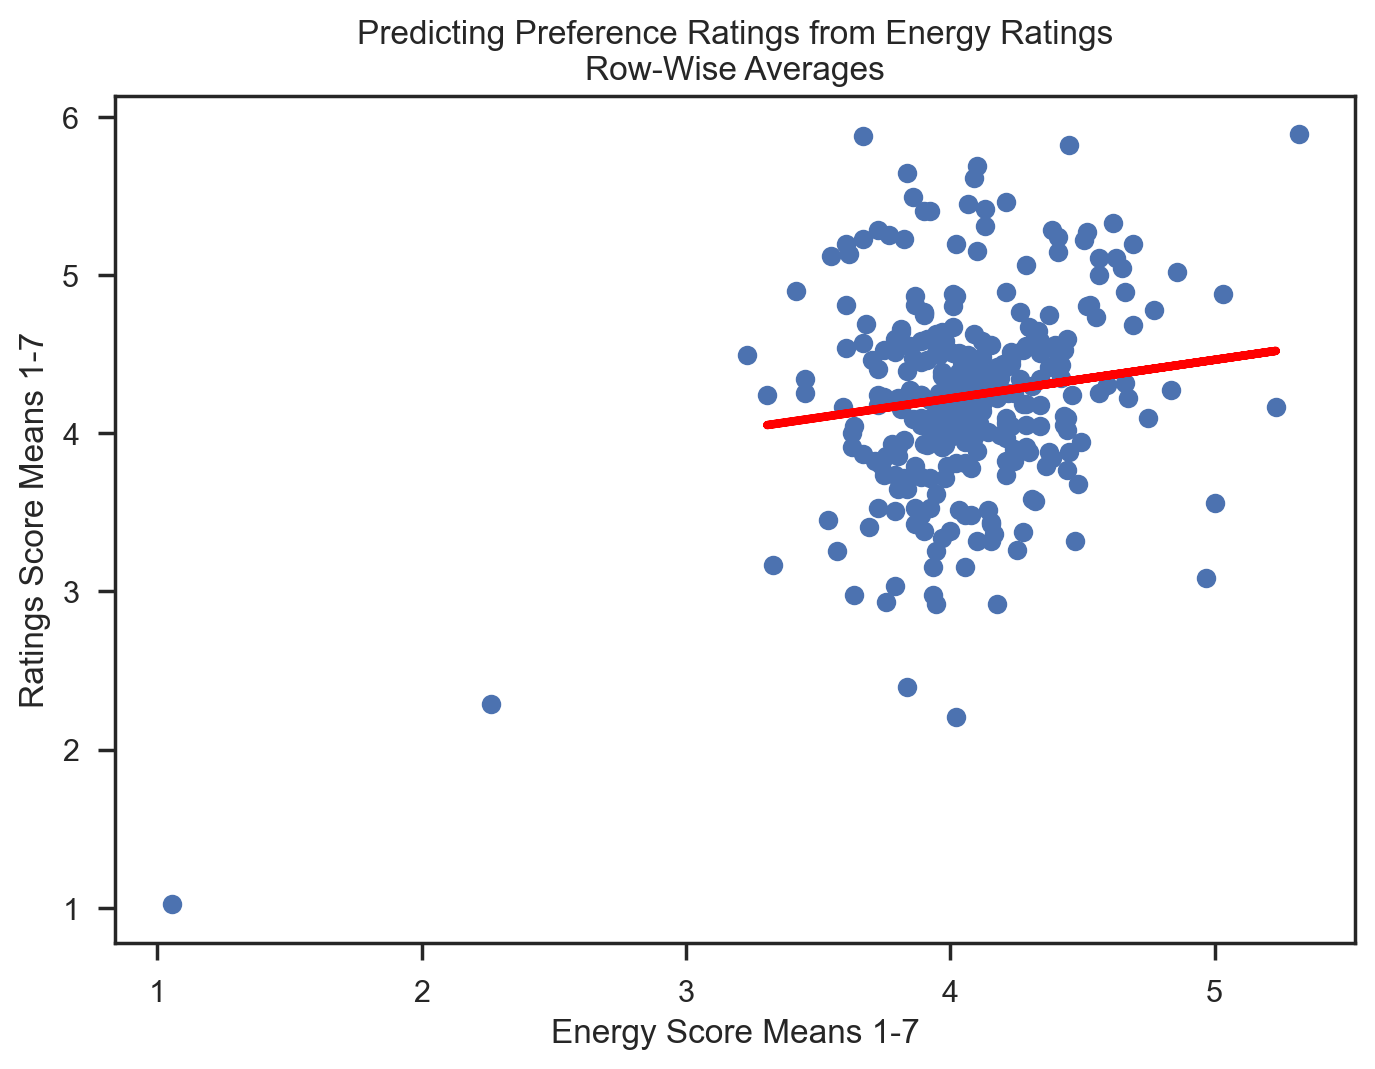

array([[4.24459052],
       [4.22315079],
       [4.12935197],
       [4.3249895 ],
       [4.18831123],
       [4.22047082],
       [4.19635113],
       [4.18027133],
       [4.25263042],
       [4.16955147],
       [4.15347167],
       [4.26335028],
       [4.23387065],
       [4.3410693 ],
       [4.38930869],
       [4.24727049],
       [4.19367116],
       [4.17223143],
       [4.25263042],
       [4.20707099],
       [4.27139018],
       [4.22047082],
       [4.29550988],
       [4.31694961],
       [4.47238765],
       [4.03287319],
       [4.18831123],
       [4.14543177],
       [4.3571491 ],
       [4.26335028],
       [4.08647251],
       [4.37054893],
       [4.31426964],
       [4.23655062],
       [4.22047082],
       [4.30354978],
       [4.1588316 ],
       [4.26067032],
       [4.21511089],
       [4.11595214],
       [4.1588316 ],
       [4.33838934],
       [4.24459052],
       [4.29818984],
       [4.24191055],
       [4.24459052],
       [4.3812688 ],
       [4.260

In [263]:
from sklearn.metrics import roc_auc_score

#X_train, X_test, y_train, y_test  = train_test_split(energy_flattened, ratings_flattened, test_size=0.5, random_state=2
def evalRegress(X,y, plot_title):
    X_train, X_test, y_train, y_test  = train_test_split(X,y,
                                                         test_size=0.3, random_state=14369331
                                                        )
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    # generate a no skill prediction (majority class)
    # testing flattened with auc adn roc
    model = LinearRegression()
    model.fit(X_train, y_train)
    # predict probabilities
    yhat = model.predict(X_test)
    r2 = r2_score(y_test,yhat)
    mse = metrics.mean_squared_error(y_test,yhat)
    rmse = np.sqrt(mse)
    #rmse = metrics.roc_curve(y_test,yhat)
    print('Accuracy: %.3f' % r2)
    print(f'R2:{r2: .3f} MSE:{mse:.3f} RMSE: {rmse:.3f}'.format(r2, mse, rmse))
    print('Coefficients: \n', model.coef_)
    plt.scatter(X,y)
    plt.plot(X_train, model.predict(X_train), color='red', linewidth=3)
    plt.title(plot_title)
    plt.xlabel('Energy Score Means 1-7')
    plt.ylabel('Ratings Score Means 1-7')
    plt.show()
    return yhat

#evalRegress(ratings_data,energy_data)
#evalRegress(energy_data,ratings_data)
evalRegress(energy_means, ratings_means, '''Predicting Preference Ratings from Energy Ratings
Column-Wise Averages''')
evalRegress(energy_means_rows,ratings_means_rows, '''Predicting Preference Ratings from Energy Ratings
Row-Wise Averages''')


##Q6 Mean Energy and Demographics

In [264]:
res = pd.DataFrame.from_dict(modelRunner.modelHistory, orient='index')
energy_rows_mean = ratings.iloc[:, 91:182].mean(axis=1)
ratings_rows_mean = ratings.iloc[:, :91].mean(axis=1)
X_and_y = pd.concat([ratings_data,energy_data,demographics], axis=1).dropna(axis=0)
X = X_and_y.iloc[:,91:]
y = X_and_y.iloc[:,:91]
z_scored = stats.zscore(X_and_y.iloc[:,91:])
#test_model(X_and_y.iloc[:,1:], X_and_y.iloc[:,[0]], 'Cross-Val for Predicting Ratings from Energy Scores and Demographics')
X_and_y.shape

(278, 188)

### Evaluation using croos_validate scikit-learn algorithm

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_explained_variance
0,-0.79,-1.49,-3.69,-0.72
1,-0.83,-1.50,-3.70,-0.80
2,-0.58,-1.40,-3.27,-0.55
3,-1.07,-1.64,-4.60,-1.05
4,-0.83,-1.63,-4.34,-0.75


Mean  R2                   -0.82
Mean -MAE                  -1.53
Mean -MSE                  -3.92
Mean  Explained Variance   -0.77
dtype: float64

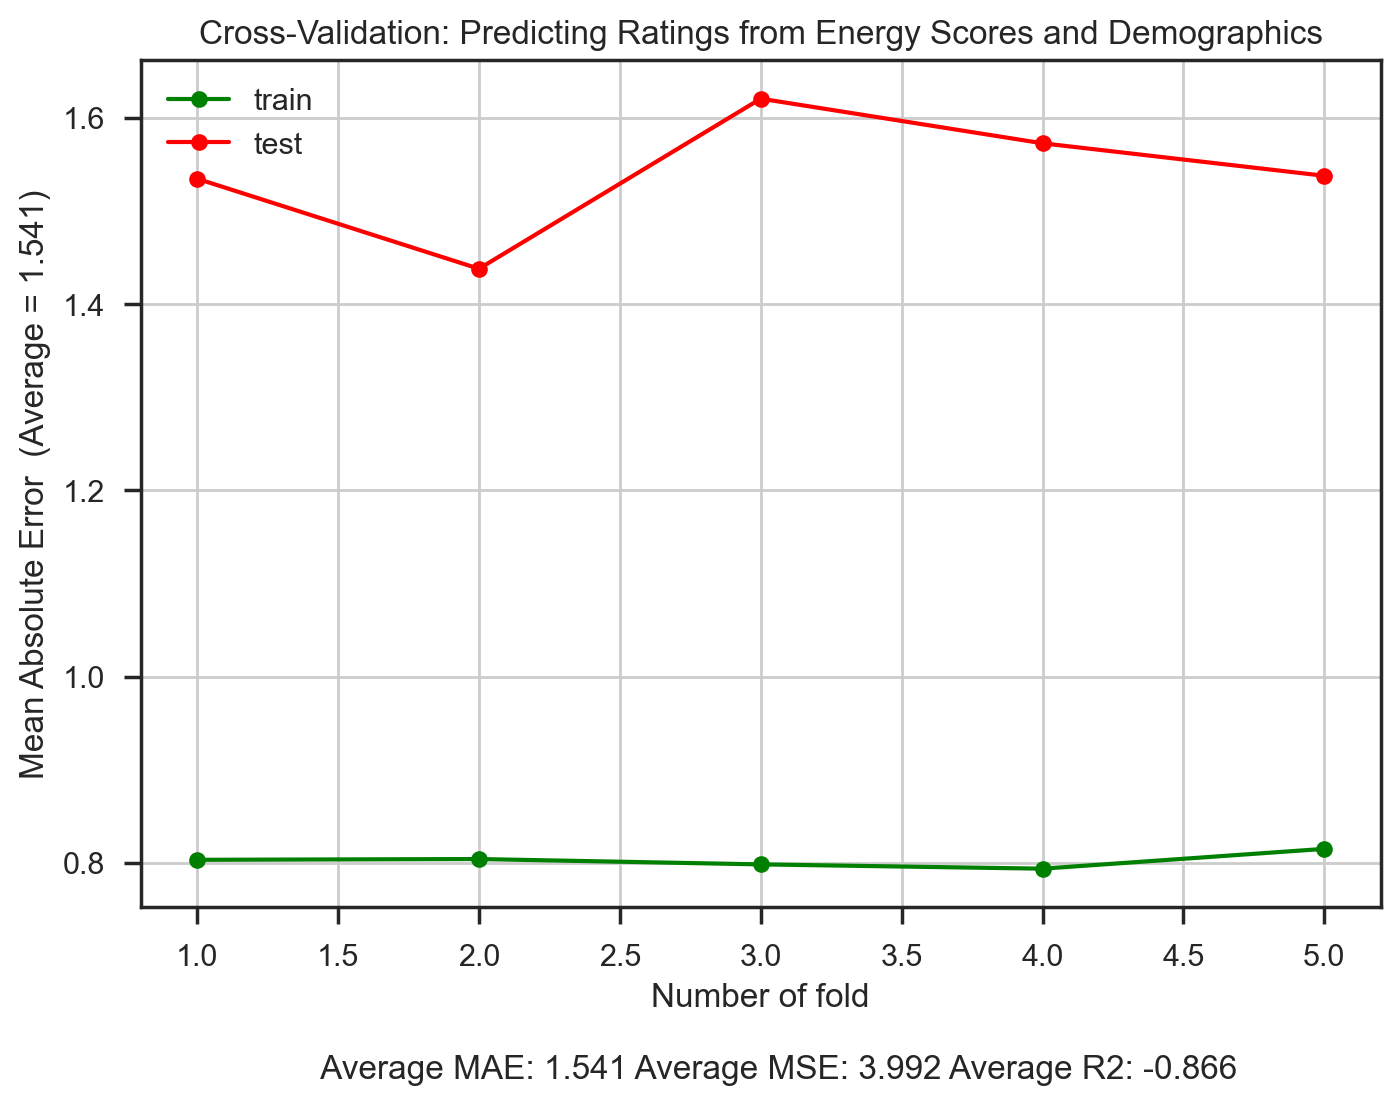

   MAE  MSE  RMSE    R2
0 1.53 3.98  2.00 -0.91
1 1.44 3.39  1.84 -0.58
2 1.62 4.44  2.11 -1.02
3 1.57 4.21  2.05 -0.94
4 1.54 3.94  1.99 -0.89
Average MAE: 1.541 Average MSE: 3.992 Average R2: -0.866


In [265]:
X = X_and_y.iloc[:,91:]
y = X_and_y.iloc[:,:91]
model = LinearRegression()
cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=14369331)
scoring = ['r2','neg_mean_absolute_error','neg_mean_squared_error','explained_variance']
n_scores = cross_validate(model, X,y, scoring=scoring, cv=cv)
n_scores.pop('fit_time')
n_scores.pop('score_time')
df = pd.DataFrame.from_dict(n_scores)
display(df)
means = df.mean(axis=0).rename({'test_r2':'Mean  R2','test_neg_mean_absolute_error':'Mean -MAE','test_neg_mean_squared_error':'Mean -MSE','test_explained_variance':'Mean  Explained Variance'})
display(means)

test_model(X, y, 'Cross-Validation: Predicting Ratings from Energy Scores and Demographics')



In [266]:

X = z_scored
y = X_and_y.iloc[:,:91]#.transpose().mean()
X_train, X_test, y_train, y_test  = train_test_split(X,y,
                                                         test_size=0.2, random_state=14369331)
model = LinearRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
r2 = r2_score(y_test,yhat)
mse = metrics.mean_squared_error(y_test,yhat)
rmse = np.sqrt(mse)
print('Accuracy: %.3f' % r2)
print(f'R2:{r2: .3f} MSE:{mse:.3f} RMSE: {rmse:.3f}'.format(r2, mse, rmse))
#auc = roc_auc_score(y_test,yhat)


Accuracy: -0.792
R2:-0.792 MSE:3.691 RMSE: 1.921


# Q7 Data Pre-Processing

In [267]:
data = np.column_stack((energy_means, ratings_means))
data = pd.DataFrame(data)
data.columns = ["energy_means", "rating_means"]
data['actual_art_type'] = art.iloc[:, 5]
data.describe()

,energy_means,rating_means,actual_art_type
count,91.00,91.00,91.00
mean,4.06,4.23,1.85
std,0.49,0.78,0.77
min,2.83,2.36,1.00
25%,3.76,3.83,1.00
50%,4.07,4.31,2.00
75%,4.32,4.71,2.00
max,5.08,5.84,3.00


#### KMeans model plotted

In [268]:

fig1 = makeBoxPlot(data, "actual_art_type", "rating_means","Box Plot of Average Artwork RATINGS distribution by Art Types")
fig2 = makeBoxPlot(data, "actual_art_type", "energy_means","Box Plot of Average Artwork ENERGY Scores distribution by Art Types")
fig1.show()
fig2.show()

In [269]:
def fixLabels(c):
    c[c == 1] += 2
    c[c == 0] += 1
    clusters = c
    return clusters


# Identifying ideal # of Clusters using Elbow method

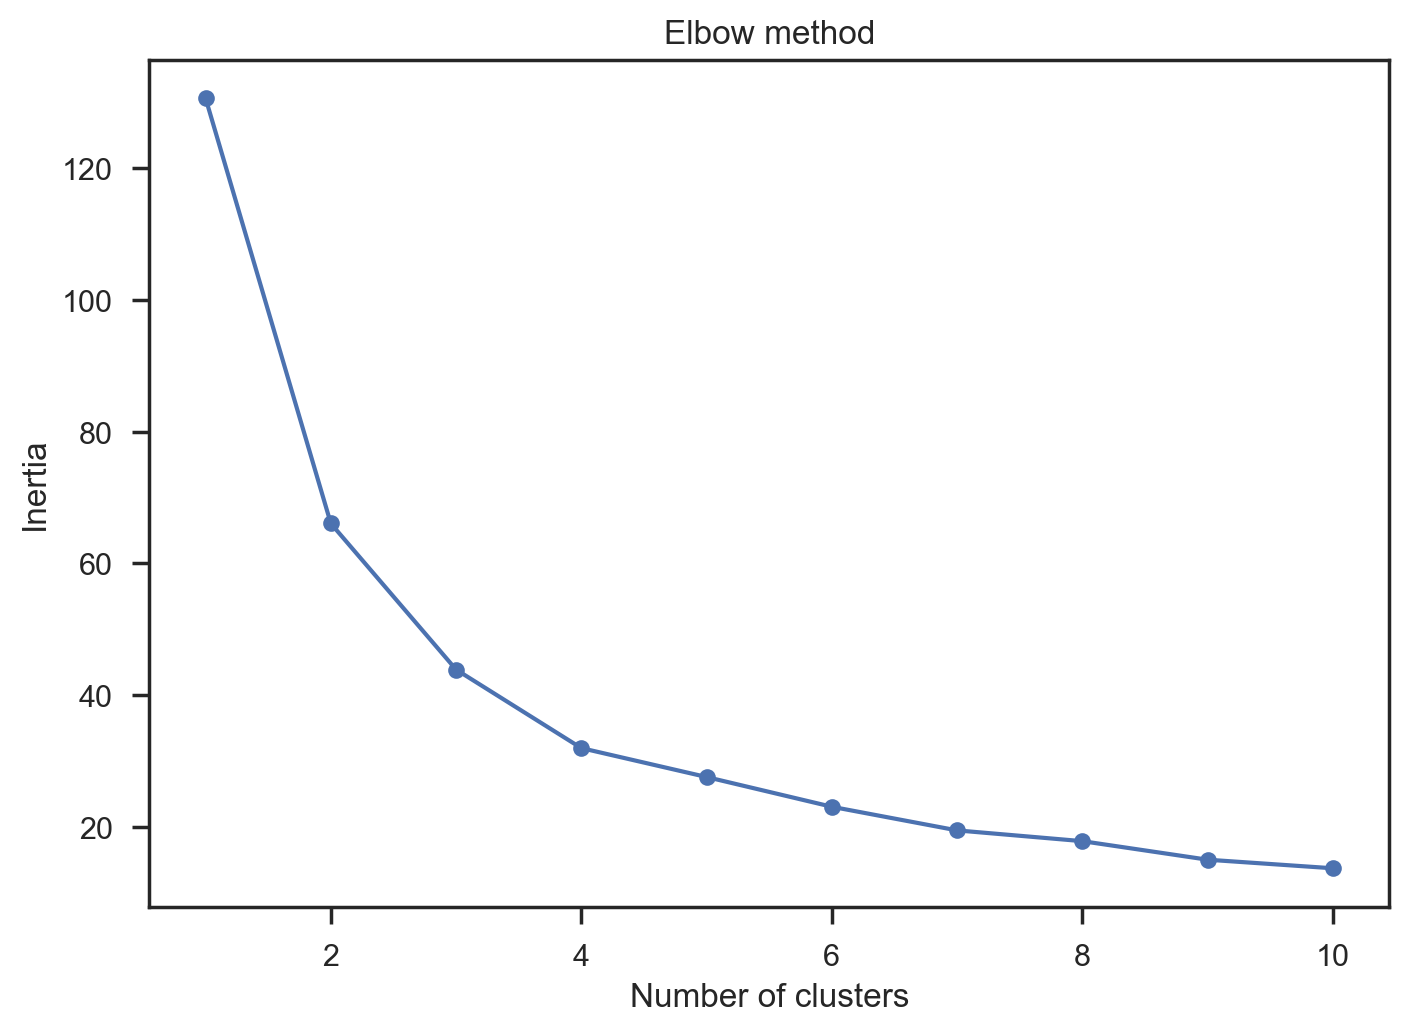

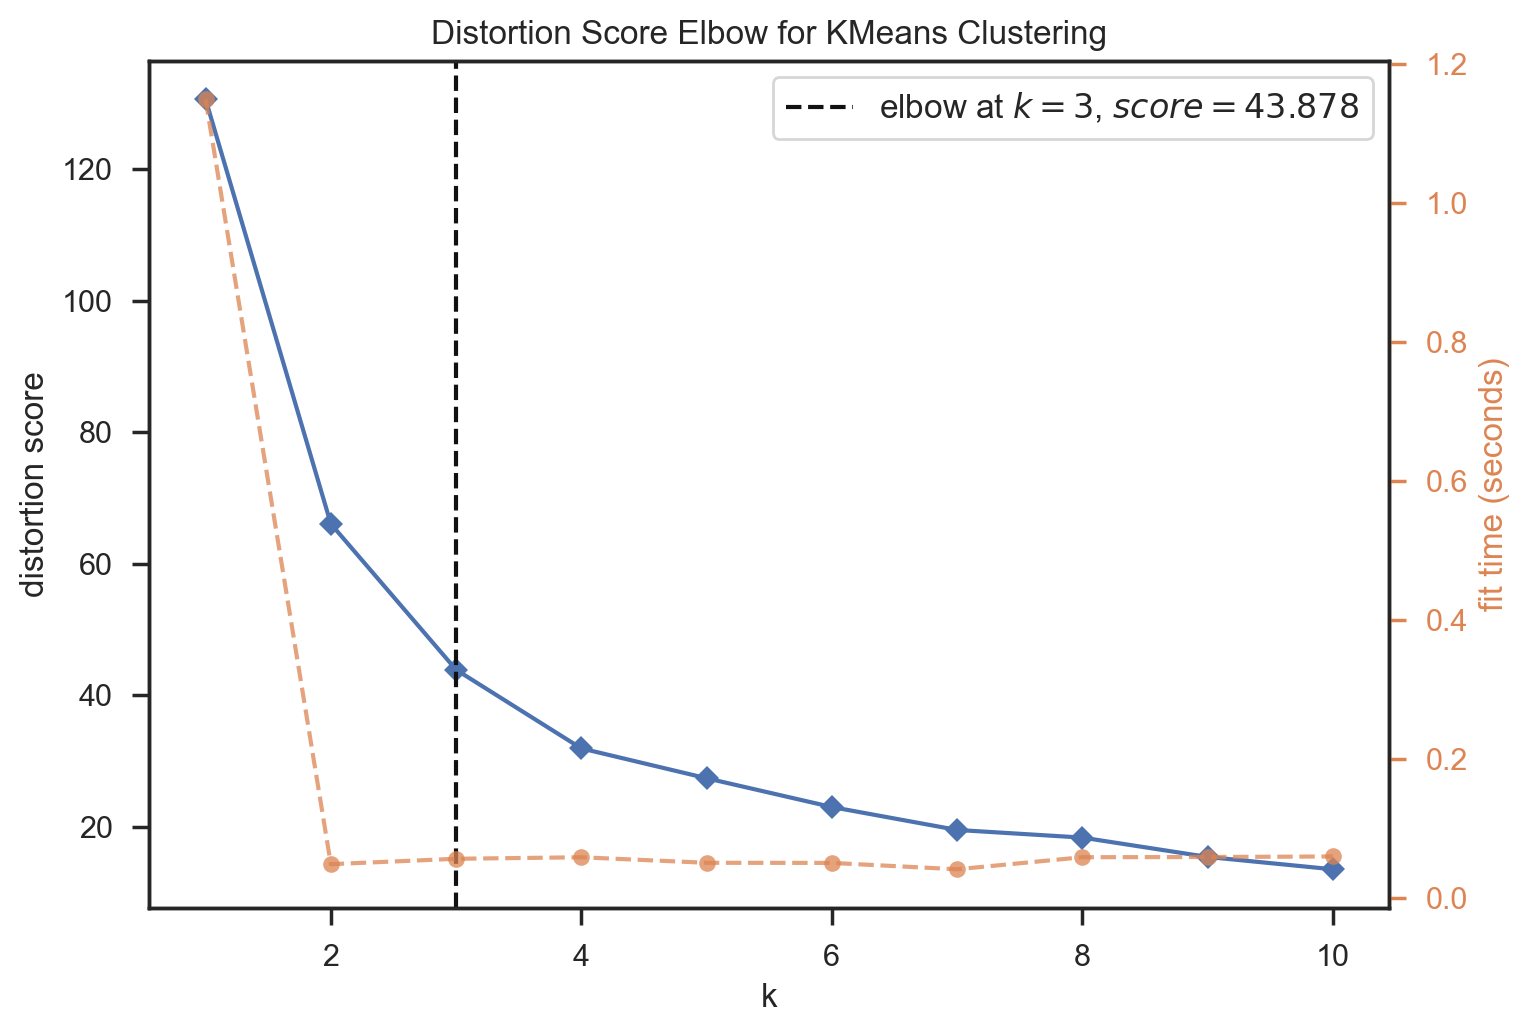

yellowbrick.cluster.elbow.KElbowVisualizer

In [270]:
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
## Using yellowbrick to plot elbow
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11)).fit(data)
visualizer.show()

type(visualizer)

## Train KMeans Model with the cluster level k = 3 as indicated by the distortion score above
######  n = 3 clusters

In [271]:

kmeans = KMeans(n_clusters=3, random_state=14369331, init='k-means++')
kmeans.fit(data.iloc[:,:2])
kmeans_results = data
labels = fixLabels(kmeans.labels_)

kmeans_results['predictions'] = labels
display_clustering_visual(model=kmeans, kmeans_results=kmeans_results)

In [272]:
import plotly.graph_objects as go


confusion_matrix(kmeans_results['actual_art_type'], kmeans_results['predictions'])

array([[17, 18,  0],
       [24,  7,  4],
       [ 3,  1, 17]], dtype=int64)

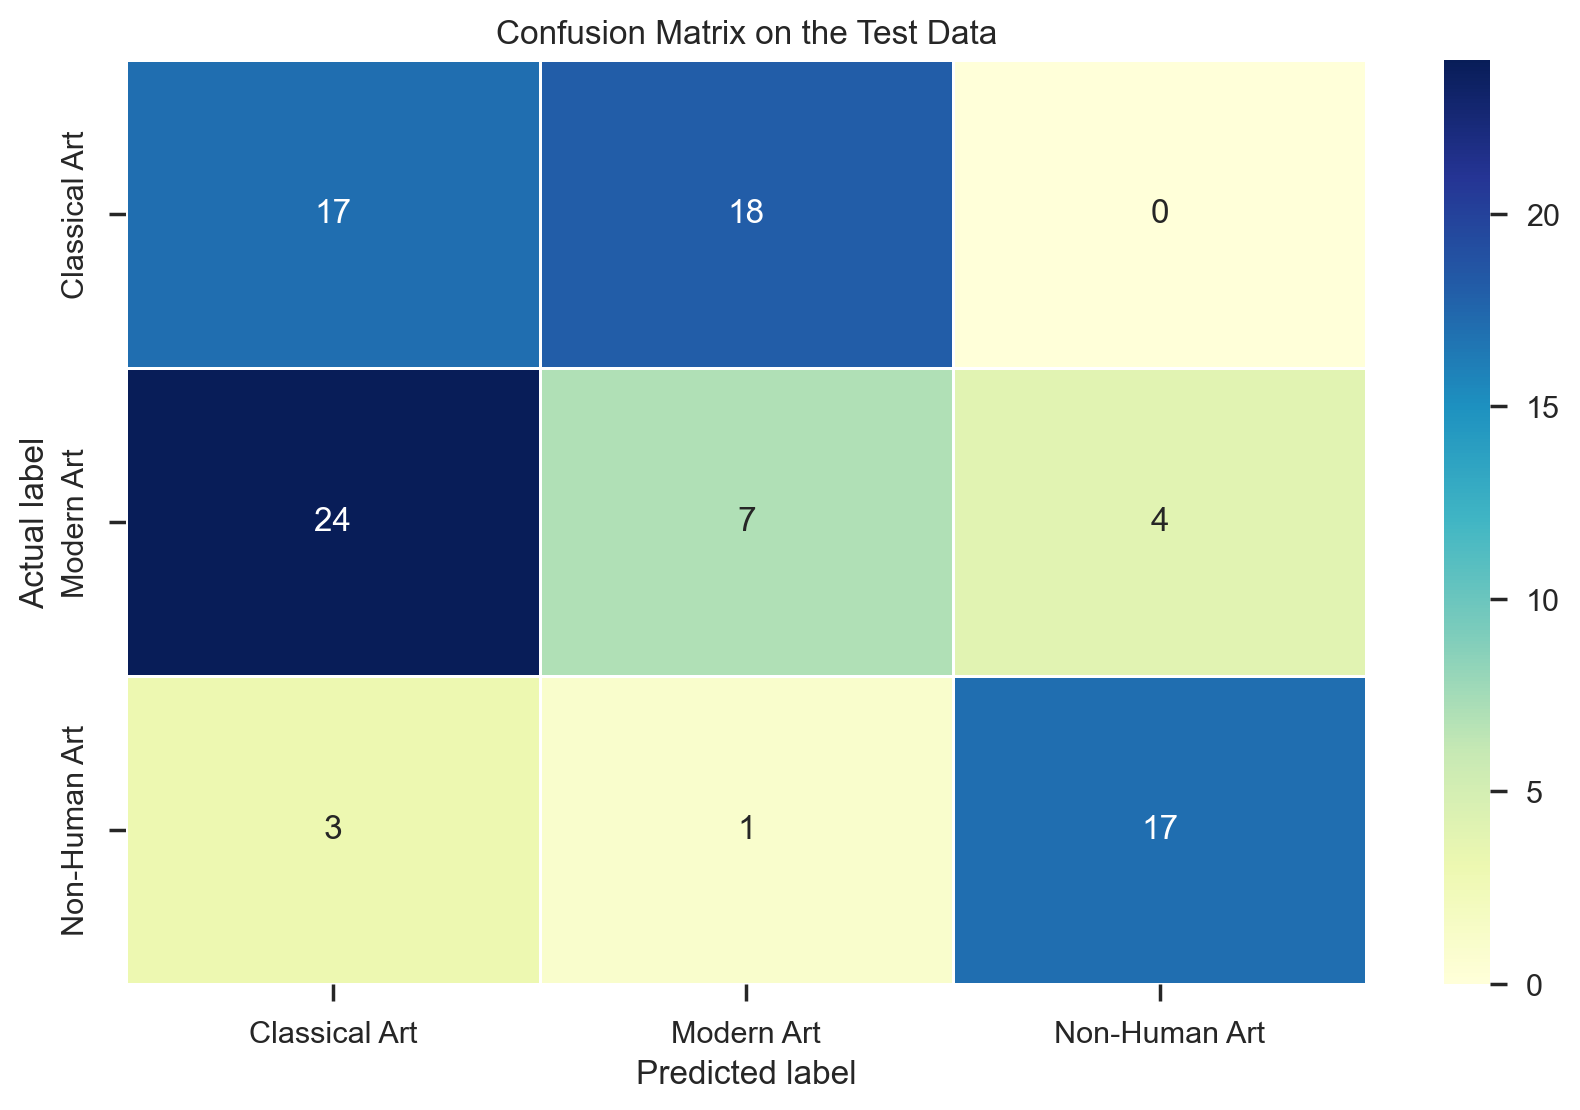

In [273]:
display_KMeans_confusion(kmeans_results['actual_art_type'], kmeans_results['predictions'], ['Classical Art', 'Modern Art','Non-Human Art'])

## Model Analysis
### Confusion Matrix

In [274]:
kMeans_report(kmeans_results)


,precision,recall,f1-score,support
Classical,0.39,0.49,0.43,35.00
Modern,0.27,0.20,0.23,35.00
Non Human,0.81,0.81,0.81,21.00
accuracy,0.45,0.45,0.45,0.45
macro avg,0.49,0.50,0.49,91.00
weighted avg,0.44,0.45,0.44,91.00


### Exploring the Variance Explained of Ratings By Questions of Self Esteem 

5.7328593776600485
1.5651814118644287
1.0846420690521712
0.8454806864618198
0.7778379082613422
0.6270791689651003
0.5757531436806457
0.5133293462817311
0.4188377310933326
0.3653949707760216


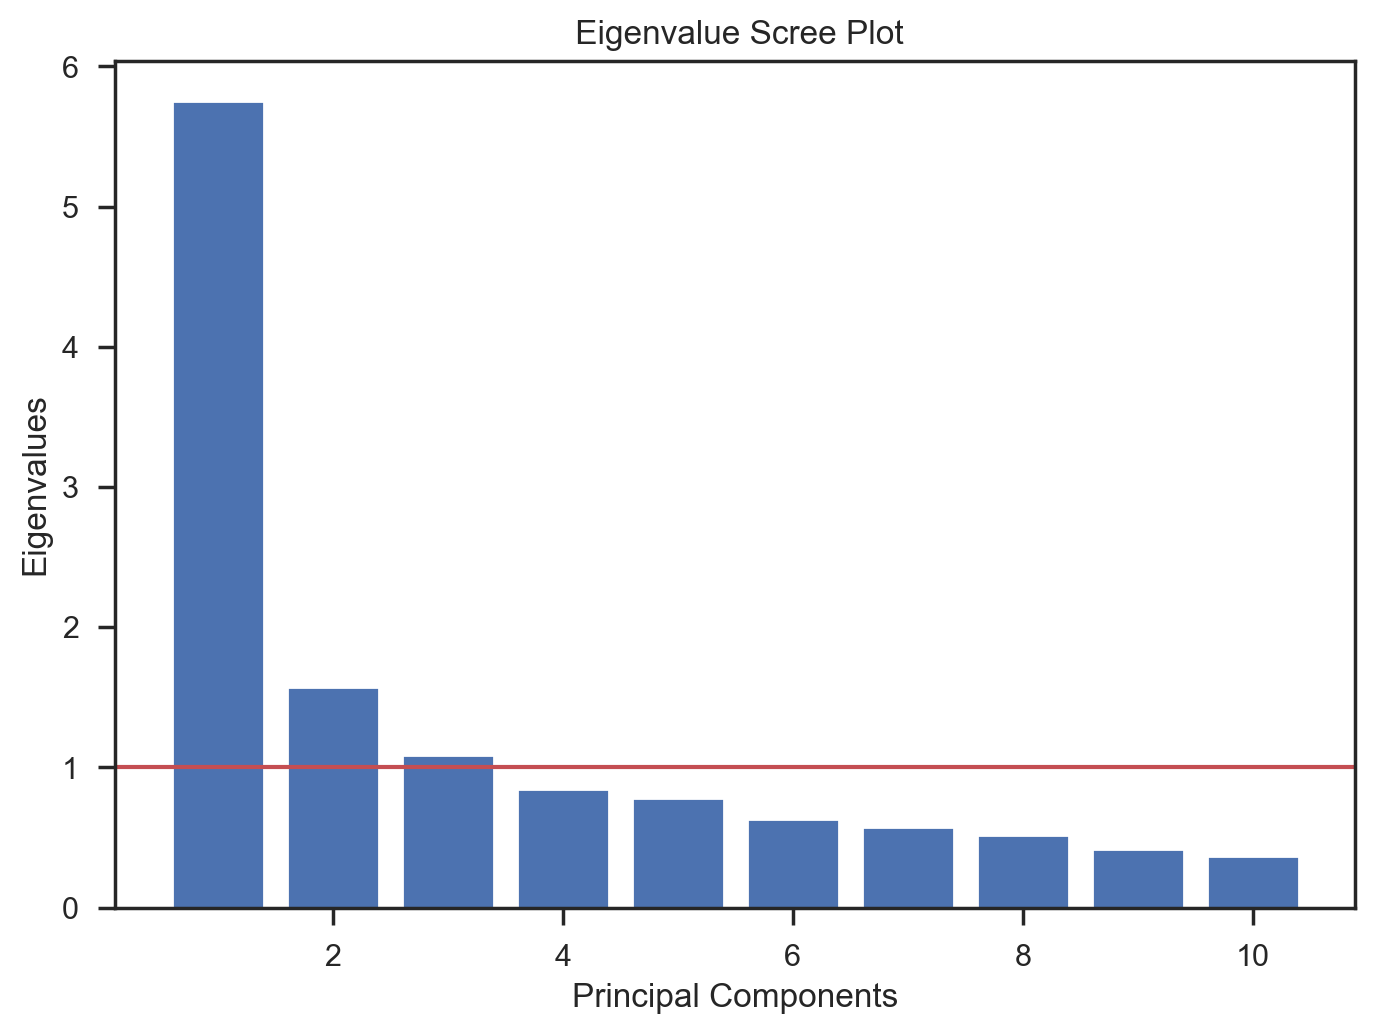

In [275]:

import functions
importlib.reload(functions)
import functions
self_esteemCols = ratings.iloc[:,205:215]
selfEst_with_ratings = pd.concat([self_esteemCols,ratings_data],axis=1).dropna(axis=0)
X = selfEst_with_ratings.iloc[:,:10]#.transpose() ##self esteem ratings post drop na
y = selfEst_with_ratings.iloc[:,10:]#.transpose()#.mean()#.values.reshape(285,1)
pca = PCA()
pca.fit_transform(X)
functions.display_eigenvalue_scree(pca.explained_variance_)
n_samples = X.shape[0]
X_centered = X - np.mean(X, axis=0)
cov_matrix = np.dot(X_centered.T, X_centered) / n_samples
eigenvalues = pca.explained_variance_
for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))


### Fitting Regression Model on the first principle component

In [276]:
model = LinearRegression()
cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=1)
scoring = {'r2':'r2', 'mae':'neg_mean_absolute_error'}
n_scores = cross_validate(model, X, y, scoring=scoring, cv=10)
for key, score in n_scores.items():
    print(f'{key}: {mean(score):.3f}'.format(key,mean(score)))

fit_time: 0.011
score_time: 0.007
test_r2: -0.081
test_mae: -1.221


,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_explained_variance
0,-0.04,-1.21,-2.22,-0.01
1,0.01,-1.27,-2.44,0.03
2,-0.06,-1.28,-2.49,-0.04
3,-0.03,-1.14,-1.98,0.00
4,-0.02,-1.20,-2.19,-0.00
5,-0.02,-1.12,-1.92,-0.00


Mean  R2                   -0.03
Mean -MAE                  -1.20
Mean -MSE                  -2.21
Mean  Explained Variance   -0.00
dtype: float64

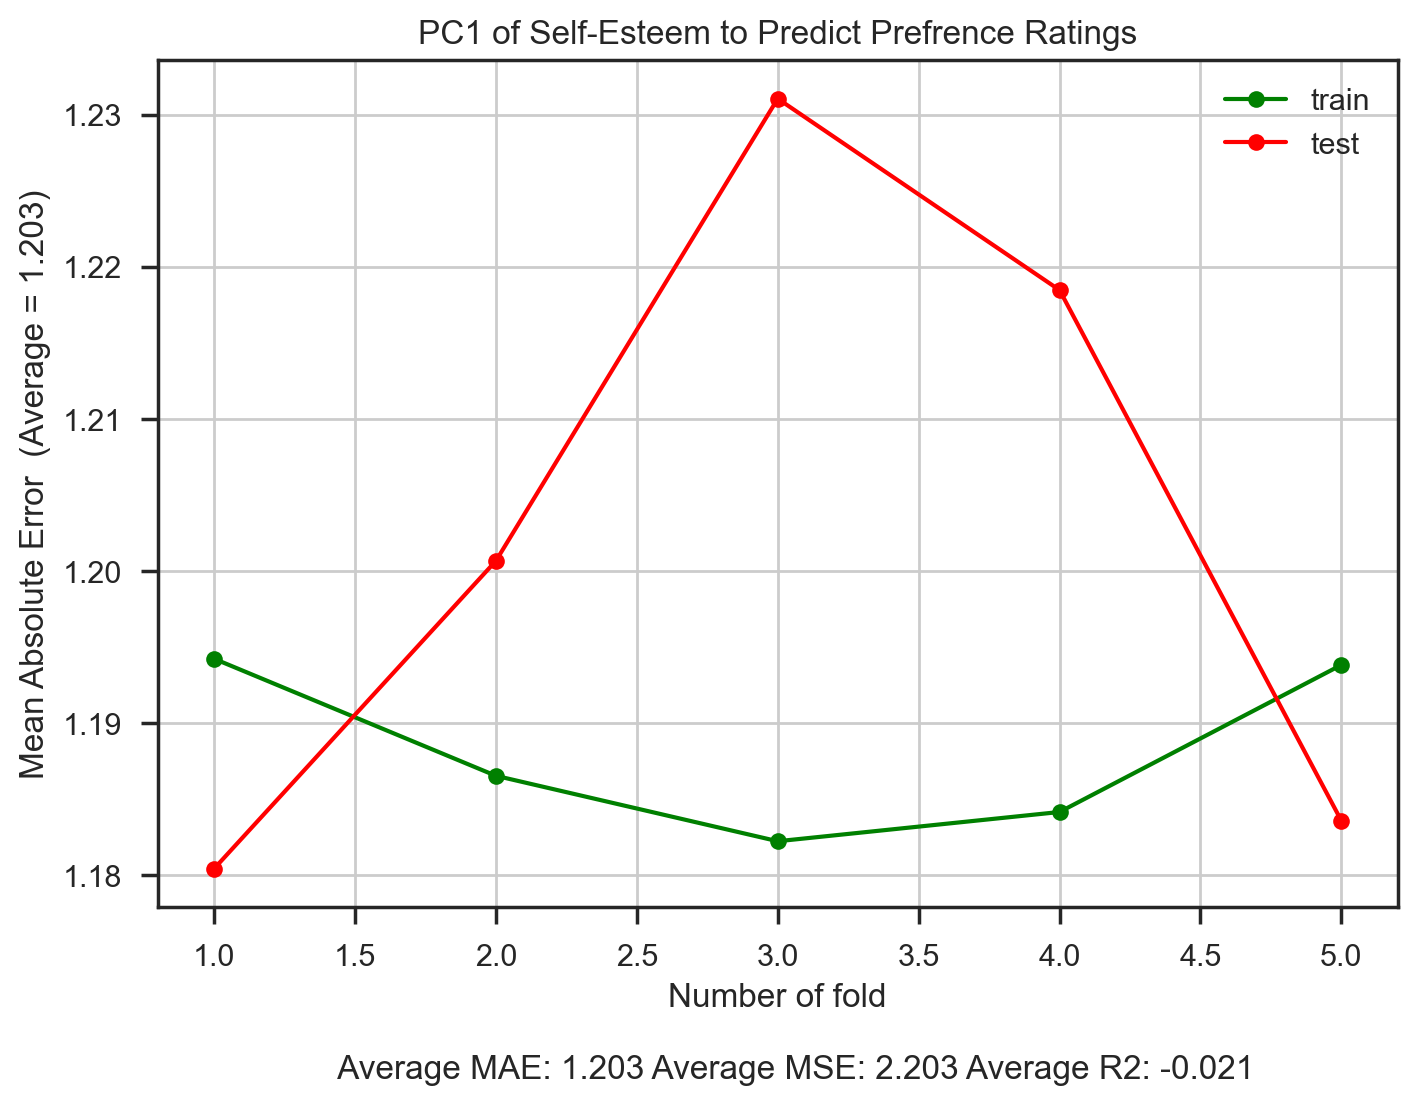

   MAE  MSE  RMSE    R2
0 1.18 2.15  1.47 -0.03
1 1.20 2.22  1.49 -0.01
2 1.23 2.28  1.51 -0.02
3 1.22 2.24  1.50 -0.02
4 1.18 2.13  1.46 -0.02
Average MAE: 1.203 Average MSE: 2.203 Average R2: -0.021


In [277]:
pca = PCA(2)
X_pca = pca.fit_transform(X)
y = selfEst_with_ratings.iloc[:,10:]
model = LinearRegression()
cv = RepeatedKFold(n_splits=6, n_repeats=1, random_state=14369331)
scoring = ['r2','neg_mean_absolute_error','neg_mean_squared_error','explained_variance']
n_scores = cross_validate(model, X_pca, y, scoring=scoring, cv=cv)
n_scores.pop('fit_time')
n_scores.pop('score_time')
df = pd.DataFrame.from_dict(n_scores)
display(df)
means = df.mean(axis=0).rename({'test_r2':'Mean  R2','test_neg_mean_absolute_error':'Mean -MAE','test_neg_mean_squared_error':'Mean -MSE','test_explained_variance':'Mean  Explained Variance'})
display(means)
test_model(X_pca,y, 'PC1 of Self-Esteem to Predict Prefrence Ratings')

### Q9

###### 9) Consider the first 3 principal components of the “dark personality” traits – use these as inputs
###### to a regression model to predict art preference ratings. Which of these components
###### significantly predict art preference ratings? Comment on the likely identity of these factors
###### (e.g. narcissism, manipulativeness, callousness, etc.).

In [278]:
dark_personality = ratings.iloc[:,182:194]
dark_personality_with_ratings = pd.concat([dark_personality,ratings_data],axis=1).dropna()
X = dark_personality_with_ratings.iloc[:,:12]#.transpose() ##self esteem ratings post drop na
y = dark_personality_with_ratings.iloc[:,12:]
dark_questions = \
                 ['I tend to manipulate others to get my way',
                  'I have used deceit or lied to get my way',
                  'I have used flattery to get my way',
                  'I tend to exploit others towards my own end',
                  'I tend to lack remorse',
                  'I tend to be unconcerned with the morality of my actions',
                  'I can be callous or insensitive',
                  'I tend to be cynical',
                  'I tend to want others to admire me',
                  'I tend to want others to pay attention to me',
                  'I tend to seek prestige and status',
                  'I tend to expect favors from others']


### Exploration of the Principal Components of Dark Personality Questions

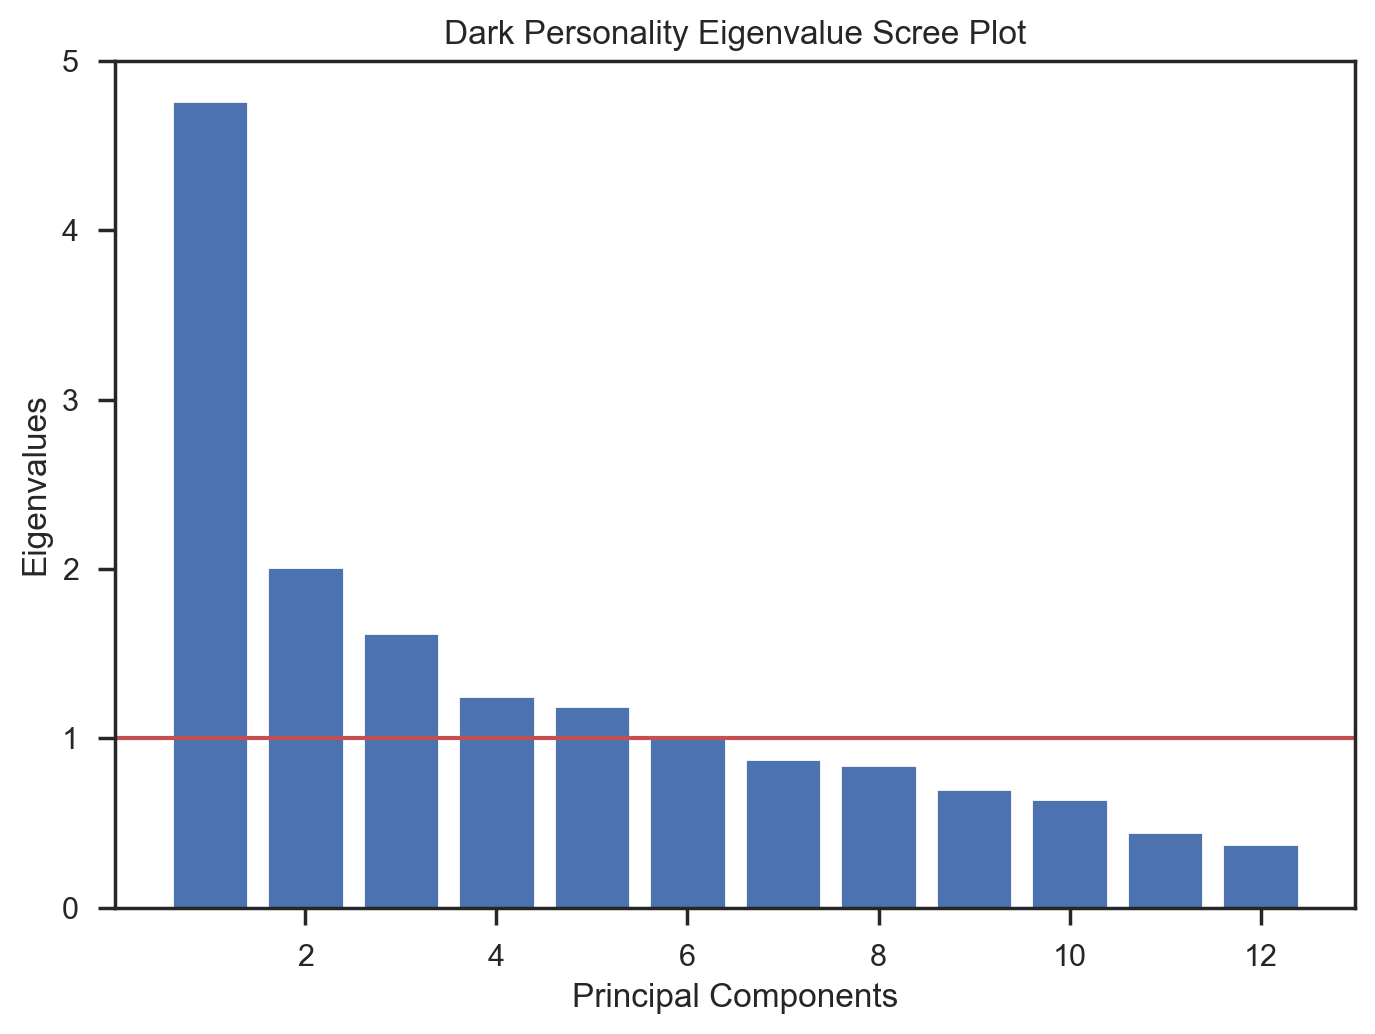

In [281]:
pca = PCA()
X_scaled = pca.fit_transform(X)
features = X_scaled.T
cov_matrix = np.cov(features)
values, vectors = np.linalg.eig(cov_matrix)
explained_variance = []
for i in values:
    explained_variance.append((i/sum(values))*100)
ex_varDf = pd.DataFrame(np.round(explained_variance,2))
ex_varDf.index += 1
v = pca.explained_variance_ratio_.round(3)
third_pc_sumv = sum(v[:3]).round(2)*100

functions.display_eigenvalue_scree(pca.explained_variance_, title = 'Dark Personality')



In [282]:
ex_variance_questions = pd.DataFrame({'Explained_Variance':np.round(explained_variance,2),'Dark_Personality_Questions':dark_questions})
#md('Explained Variance of Dark Personality Questions'.title())

In [302]:
ex_var_display = ex_variance_questions[['Dark_Personality_Questions','Explained_Variance']]
ex_var_display.index += 1
#display(ex_var_display)
ex_var_display

,Dark_Personality_Questions,Explained_Variance
1,I tend to manipulate others to get my way,30.29
2,I have used deceit or lied to get my way,12.79
3,I have used flattery to get my way,10.32
4,I tend to exploit others towards my own end,2.41
5,I tend to lack remorse,2.83
6,I tend to be unconcerned with the morality of ...,7.95
7,I can be callous or insensitive,7.57
8,I tend to be cynical,6.39
9,I tend to want others to admire me,4.06
10,I tend to want others to pay attention to me,4.45


## n=3 for pca Predicting Artwork Ratings

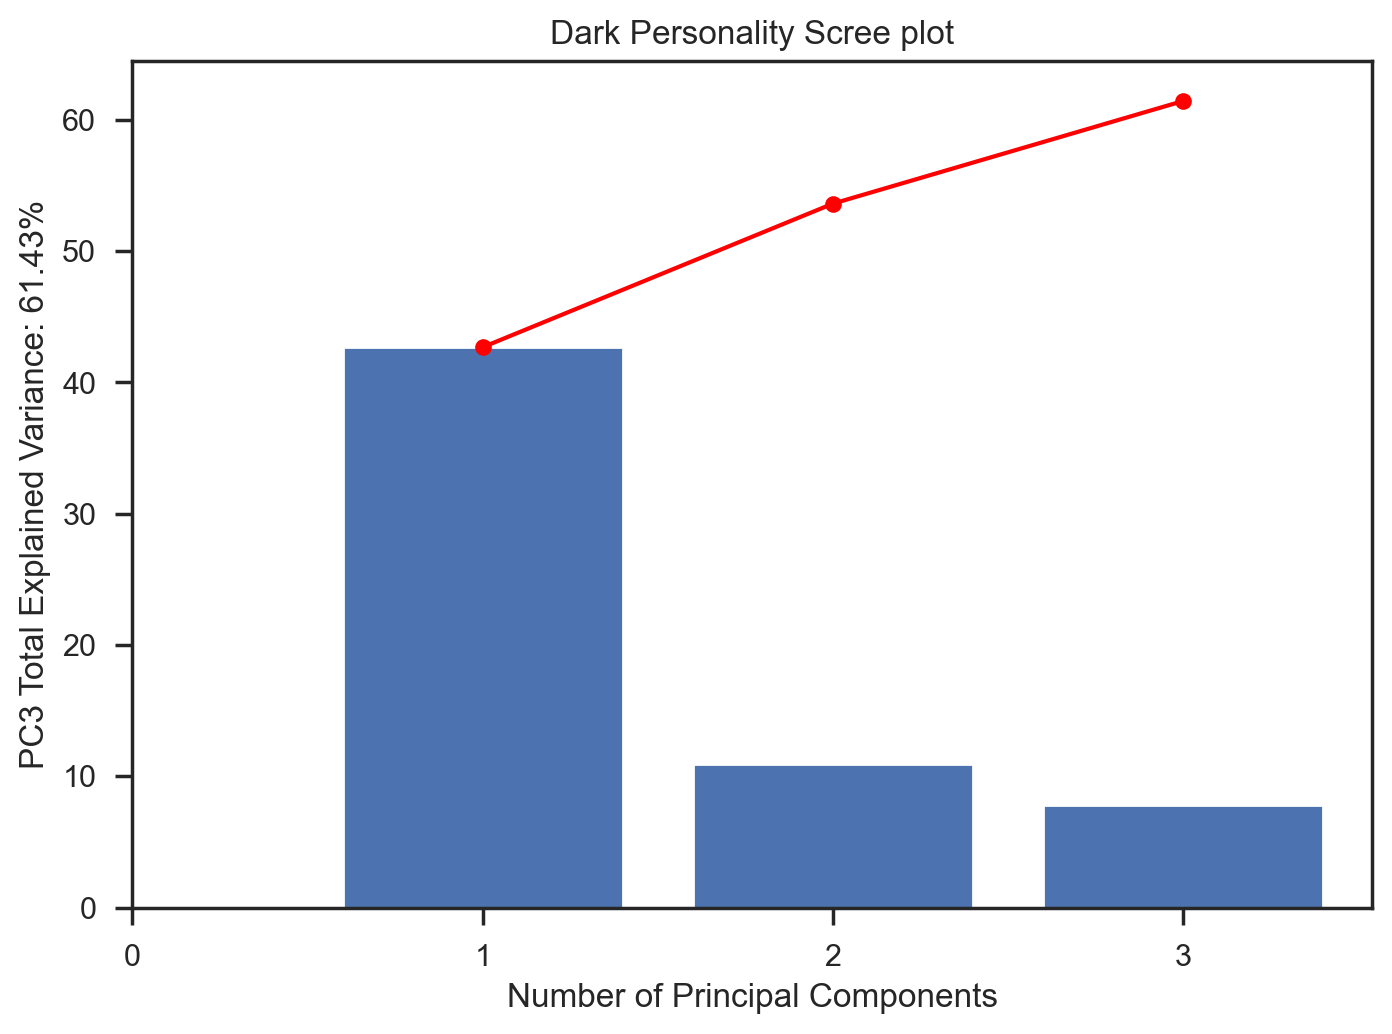

In [295]:
##apply pca reduction to 3 dimensions to dark personality traits and art ratings
X = dark_personality_with_ratings.iloc[:,:12].transpose() ##self esteem ratings post drop na
y = dark_personality_with_ratings.iloc[:,12:]
pca3 = PCA(n_components=3)
x_pca3 = pca3.fit_transform(X)

functions.display_scree_plot(pca3,kaiser=False, title='Dark Personality')



### Determining Most Important Features

In [300]:
pca = PCA()


X = dark_personality_with_ratings.iloc[:,:12].transpose()
pca.fit(X)
X_pc = pca.transform(X)
n_pcs= pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
most_important
initial_feature_names = dark_questions
n_pcs
# most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
# # dic = {i: most_important_names[i] for i in range(n_pcs)}
# df = pd.DataFrame.from_dict(dic, orient='index',columns=['Dark Personality Questions'])
# explained_var = pd.Series((pca.explained_variance_*10).round(),name='Explained Variance %').astype(str)
# df = df.join(explained_var)
# df.index +=1
# display(df)

12

### Fitting the Regression model

In [301]:
y = dark_personality_with_ratings.iloc[:,12:]
model = LinearRegression()
cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=14369331)
scoring = ['r2','neg_mean_absolute_error','neg_mean_squared_error','explained_variance']

n_scores = cross_validate(model, X_pc, y, scoring=scoring, cv=cv)
n_scores.pop('fit_time')
n_scores.pop('score_time')

df = pd.DataFrame.from_dict(n_scores)
display(df)
means = df.mean(axis=0).rename({'test_r2':'Mean  R2','test_neg_mean_absolute_error':'Mean -MAE','test_neg_mean_squared_error':'Mean -MSE','test_explained_variance':'Mean  Explained Variance'})
display(means)

test_model(X_pc,y, 'predicting Prefrence Ratings from Dark Personality')



ValueError: Found input variables with inconsistent numbers of samples: [12, 283]

R2 score:  0.06021669746780711


PCA,t-value,p-value,variance ratio,std dev
1,10.47,0.00,0.43,13.38
2,5.30,0.00,0.11,6.77
3,4.48,0.00,0.08,5.73


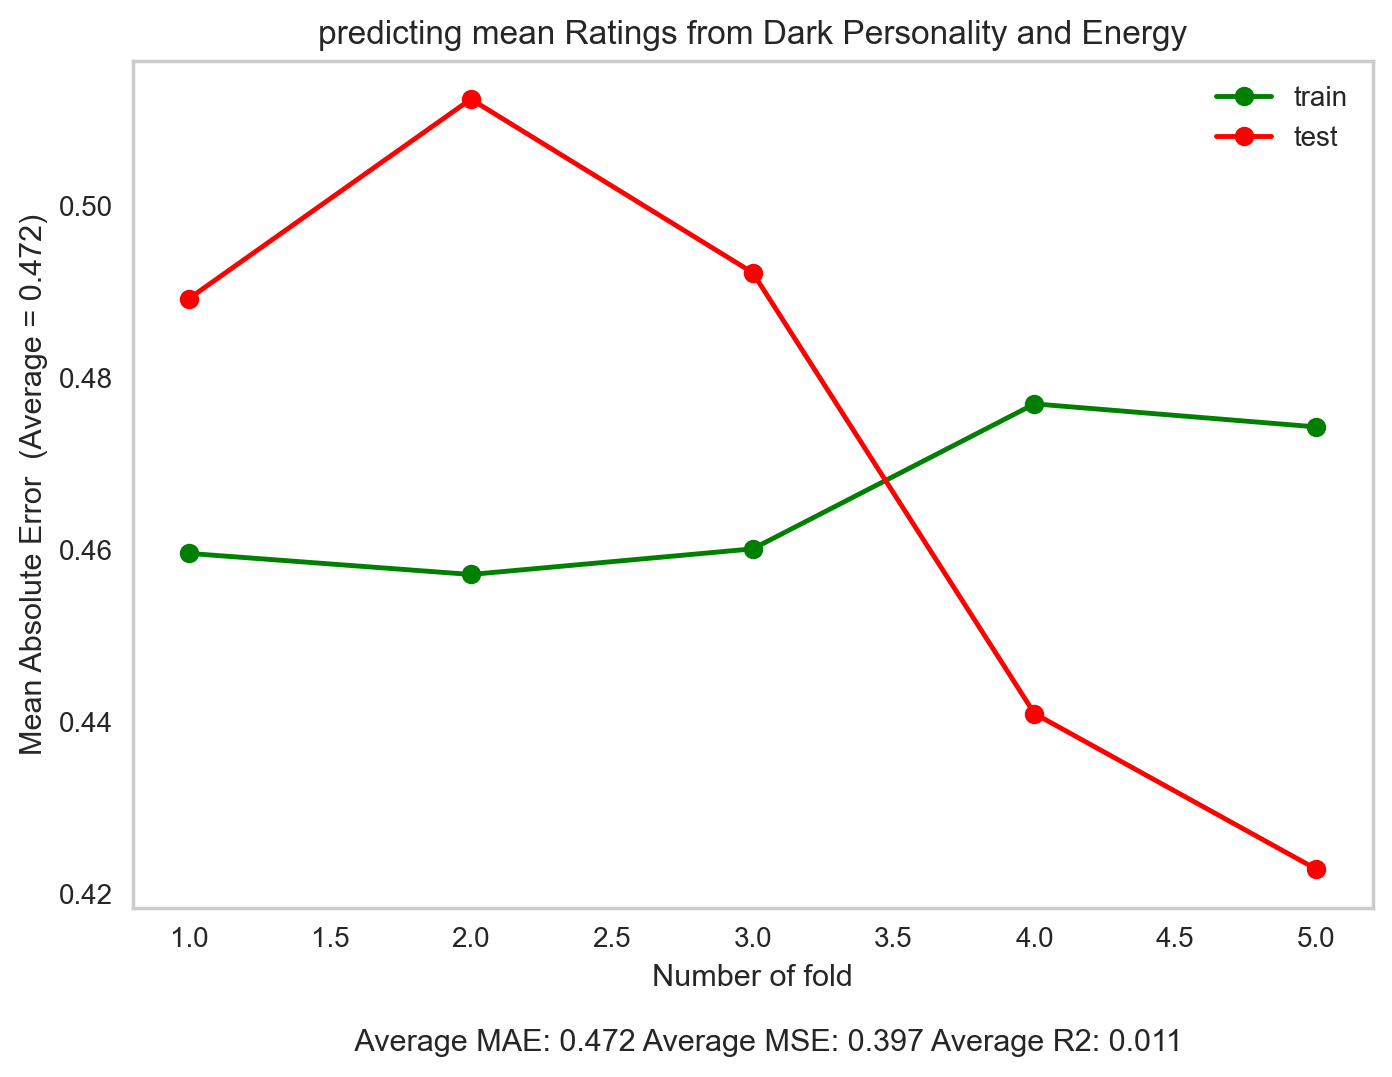

   MAE  MSE  RMSE    R2
0 0.49 0.51  0.72  0.04
1 0.51 0.40  0.64  0.01
2 0.49 0.42  0.65 -0.02
3 0.44 0.30  0.54 -0.01
4 0.42 0.35  0.59  0.03
Average MAE: 0.472 Average MSE: 0.397 Average R2: 0.011


In [ ]:
# Trying again with mean y
X = dark_personality_with_ratings.iloc[:,:12].transpose()
y = dark_personality_with_ratings.iloc[:,12:].transpose().mean().values.reshape(283,1)
pca = PCA(n_components=3)
pca.fit_transform(X)
x_pca = pca.components_.T

X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=14369331)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2 score: ', r2_score(y_test, y_pred))




modelRunner.regressionEval(X_test, y_test,'Pca_Reduction_Q9','apply pca reduction to 3 dimensions to dark personality traits and art ratings without scaling during pca')
df = calc_pca_sig(pca, X)
display(HTML(df.to_html(index=False)))
test_model(x_pca,y, 'predicting mean Ratings from Dark Personality and Energy')

# Q10

### Data Pre-processing

In [ ]:
data = pd.read_csv(data_file)
political = pd.DataFrame(data['3.24'])
encoder= ce.OrdinalEncoder(cols=['3.24'],return_df=True,
                           mapping=[{'col':'3.24','mapping':{1:0, 2:0, 3:1, 4:1, 5:1, 6:1}}])
political['encoded'] = encoder.fit_transform(political)

ratings = data.iloc[:,:91]
energy = data.iloc[:,91:182]
dark = data.iloc[:,182:194] #PCA
action = data.iloc[:,194:205] #PCA
esteem = data.iloc[:,205:215] #PCA
demographics = data[['19','2.45','0','2.46','2.47']]

all = pd.concat([ratings,energy,dark,action,esteem,demographics,political.encoded],axis=1).dropna(axis=0)

ratings = all.iloc[:,:91]
energy = all.iloc[:,91:182]
dark = all.iloc[:,182:194] #PCA
action = all.iloc[:,194:205] #PCA
esteem = all.iloc[:,205:215] #PCA
demographics = all[['19','2.45','0','2.46','2.47']]
political_y = all.encoded

In [ ]:
px.histogram(action,title='Action Columns Histogram')
# show the histogram
fig = px.histogram(ratings,title='Prefrence Ratings Distribution')
fig.show()
fig = px.histogram(energy,title='Energy Columns Histogram')
fig.show()
px.histogram(esteem,title='Esteem Columns Histogram')

In [ ]:
X = dark.transpose()
pca = PCA()
pca.fit_transform(X)
n_samples = X.shape[0]


X_centered = X - np.mean(X, axis=0)
cov_matrix = np.dot(X_centered.T, X_centered) / n_samples
eigenvalues = pca.explained_variance_
for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
    print()
    print(eigenvalue)

159.59243162301806

174.10083449783775
40.006937255000835

43.64393155090997
29.384923942342006

32.05628066437315
27.55506783432451

30.060074001081283
24.20341807090188

26.403728804620197
21.3787557486067

23.322278998480012
19.768219866331798

21.565330763271056
15.977788902234503

17.430315166074003
14.301452015194391

15.601584016575716
10.573510121588978

11.534738314460705
8.993605731567534

9.811206252619128
-6.836084430271054e-16

6.821975445836924e-30


#### PCA to Reduce Dimensions using Kaiser Threashold 

##### Dark Energy PCA

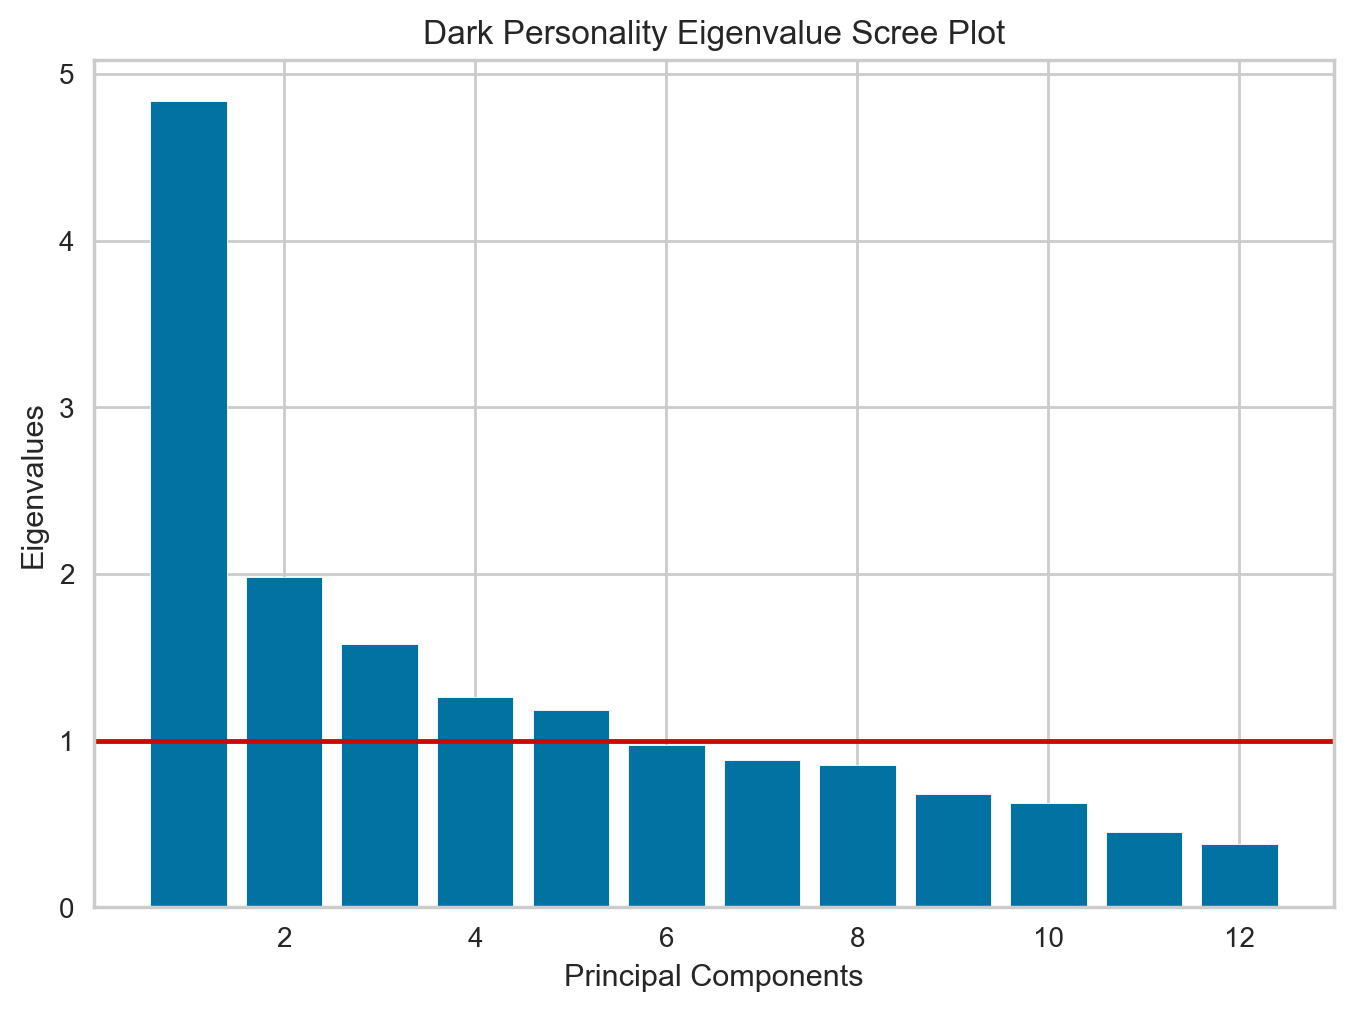

In [ ]:
##
import functions
importlib.reload(functions)
import functions
# determining optimal dimensions Dark
pca = PCA()
pca.fit_transform(dark)
functions.display_eigenvalue_scree(pca.explained_variance_, "Dark Personality")


##### Action PCA

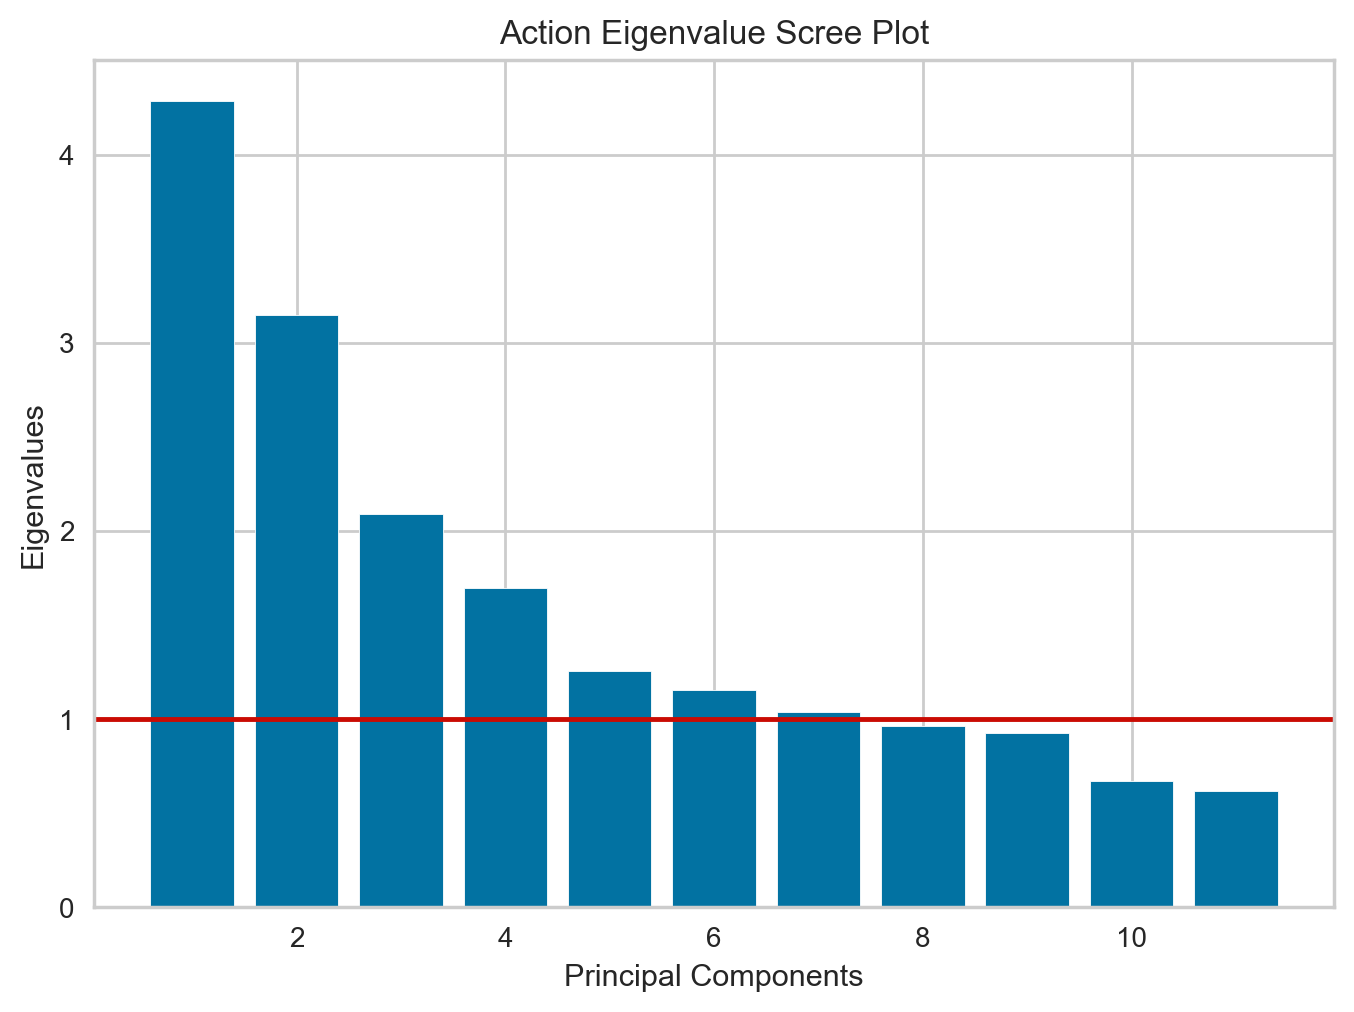

In [ ]:

pca = PCA()
pca.fit_transform(action)
functions.display_eigenvalue_scree(pca.explained_variance_, "Action")



##### Self-Esteem PCA


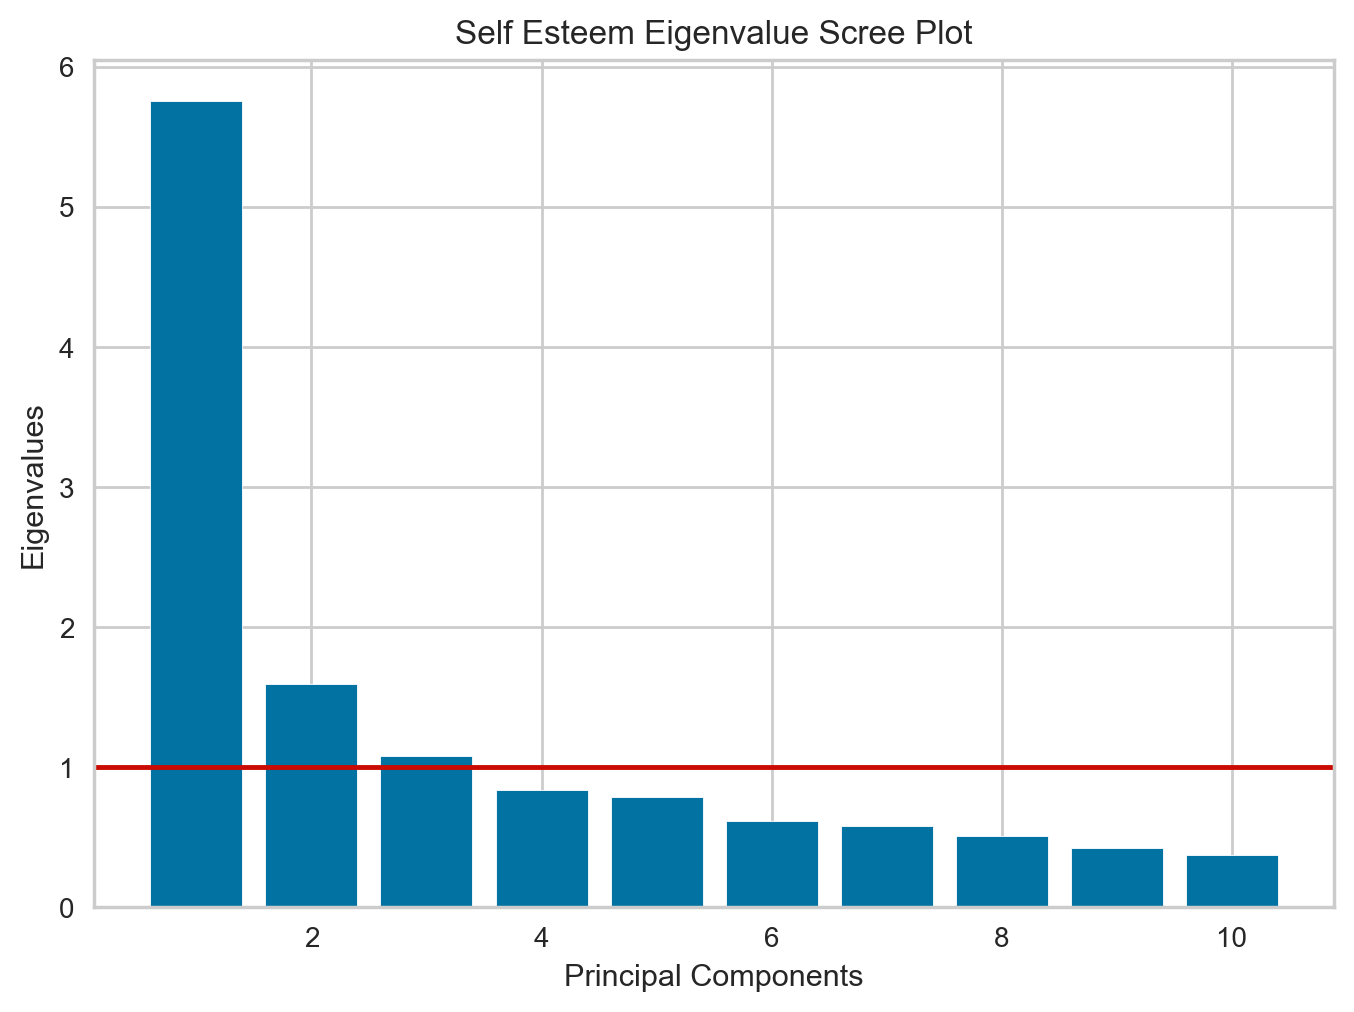

In [ ]:

pca = PCA()
pca.fit_transform(esteem)
functions.display_eigenvalue_scree(pca.explained_variance_, "Self Esteem")



In [ ]:
pca = PCA(3)
pca.fit_transform(dark.transpose())
dark_pca = pd.DataFrame(pca.components_.T)


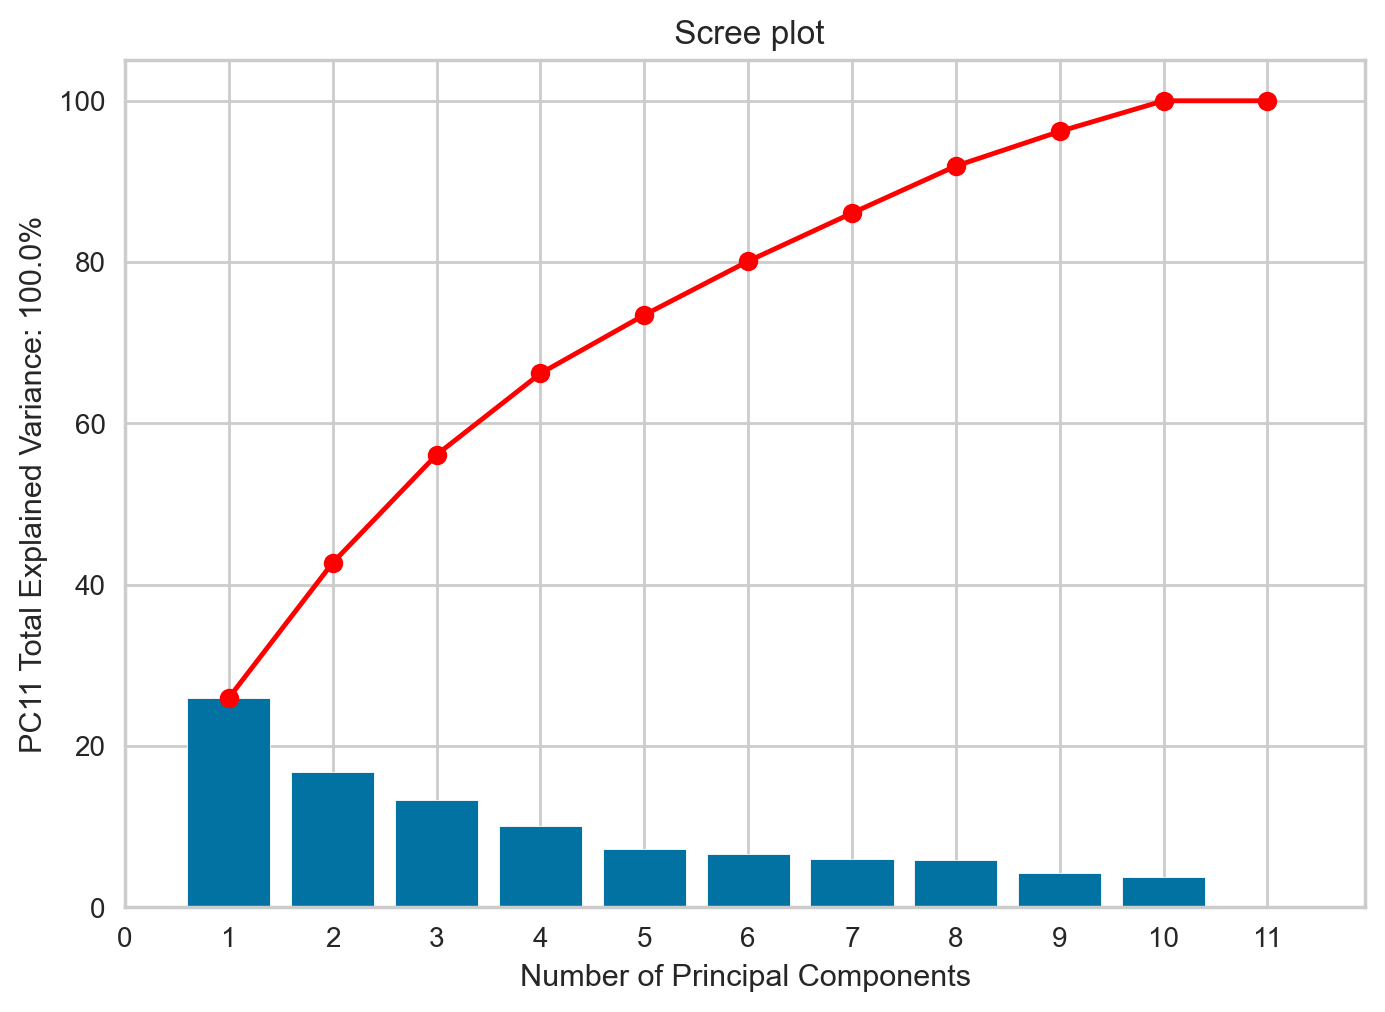

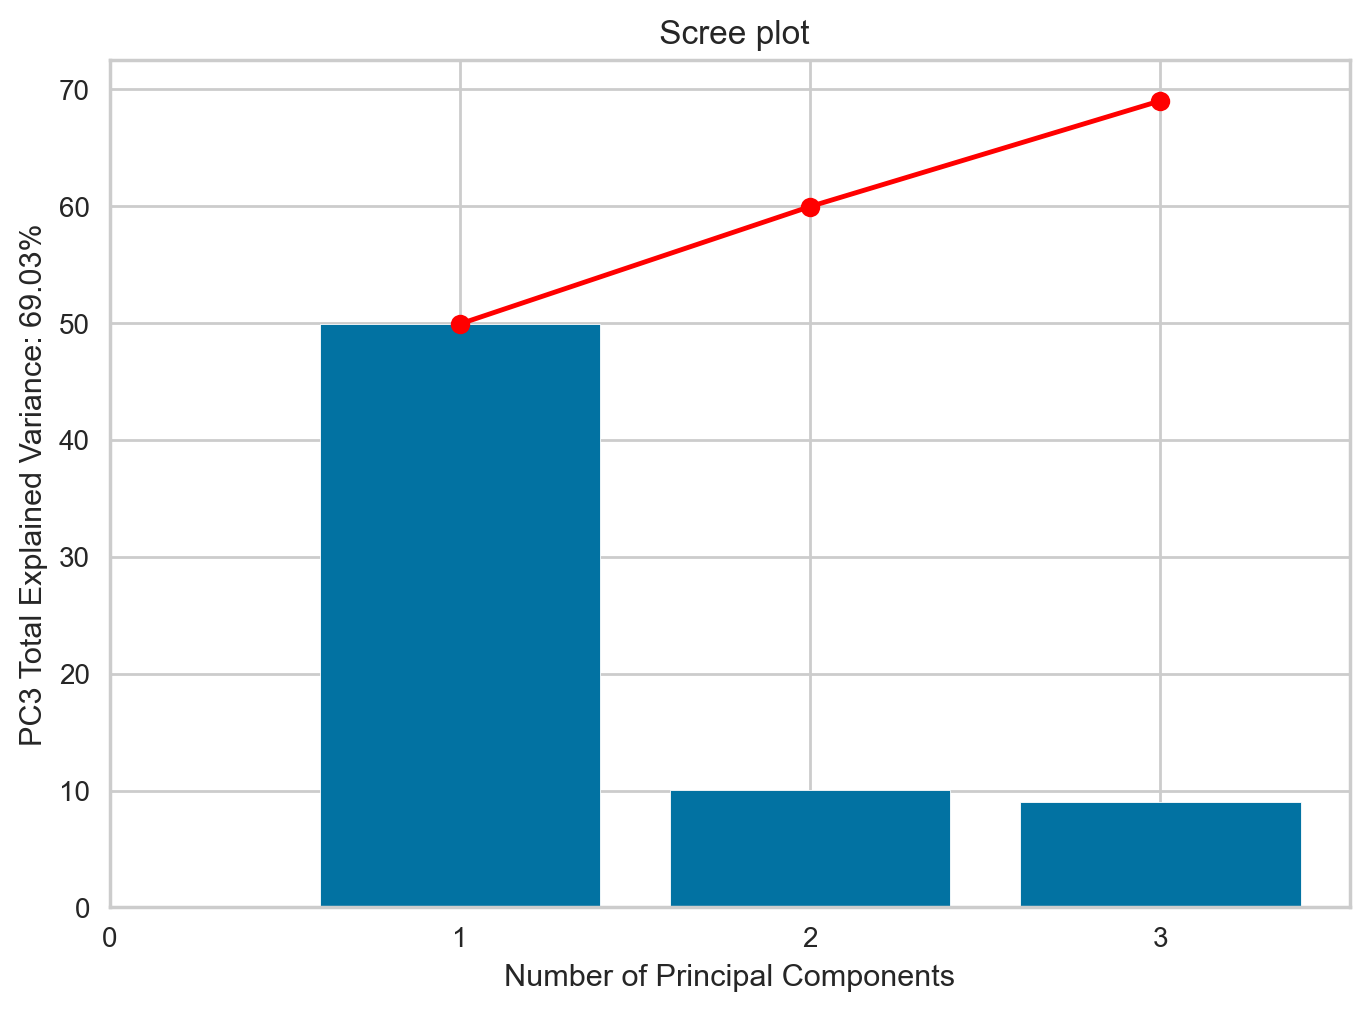

In [ ]:

pca = PCA()
pca.fit_transform(action.transpose())
display_scree_plot(pca)
pca = PCA(4)
pca.fit_transform(action.transpose())
action_pca = pd.DataFrame(pca.components_.T)
action_pca.columns = ['actPca1','actPca2','actPca3','actPca4']

pca = PCA(3)
pca.fit_transform(esteem.transpose())
esteem_pca = pd.DataFrame(pca.components_.T)
esteem_pca.columns = ['estPca1','estPca2','estPca3']
display_scree_plot(pca)
pca_cols = pd.concat([dark_pca,action_pca,esteem_pca],axis=1, ignore_index=True)
pca_cols.columns = ['11','22','33','44','55','66','77','88','99','100']
pca_cols.reset_index(inplace = True, drop = True)

In [ ]:
esteem_pca.columns = ['estPca1','estPca2','estPca3']
ratings.mean(axis=1)


0     3.93
1     5.41
2     4.80
3     4.23
4     3.98
      ... 
294   5.04
295   4.18
296   4.33
297   5.02
298   5.82
Length: 275, dtype: float64

In [ ]:
mode = 1

if mode == 1: 
    non_pca = pd.concat([ratings,energy,demographics],axis=1,ignore_index=True)
if mode == 2:
    non_pca = pd.concat([ratings.mean(axis=1),energy.mean(axis=1),demographics],axis=1,ignore_index=True)
if mode == 3: 
    non_pca = pd.concat([demographics],axis=1,ignore_index=True)

non_pca.reset_index(inplace = True, drop = True)
X = pd.concat([non_pca, pca_cols],axis=1,ignore_index=True)
y = political_y
X.shape

(275, 197)

## Testing Various Models

### Regression Model

In [ ]:
model = LinearRegression()
cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=14369331)
scoring = {'r2':'r2', 'mae':'neg_mean_absolute_error'}
n_scores = cross_validate(model, X, y, scoring=scoring, cv=)
for key, score in n_scores.items():
    print(f'{key}: {mean(score):.3f}'.format(key,mean(score)))

fit_time: 0.012
score_time: 0.004
test_r2: -22.493
test_mae: -1.837


### Logistic Regression Model 

In [ ]:
model = LogisticRegression()
cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=14369331)
scoring = ['accuracy']
n_scores = cross_validate(model, X, y, scoring=scoring, cv=cv)
for key, score in n_scores.items():
    print(f'{key}: {mean(score):.3f}'.format(key,mean(score)))
    

fit_time: 0.039
score_time: 0.004
test_accuracy: 0.634


### Random Forest Model

In [ ]:
model = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=14369331)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Model Accuracy: %.3f (SD of R2 %.3f)' % (np.mean(n_scores), np.std(n_scores)))
'''
Model Accuracy Decreased After Removing Ratings and Energy Features
'''

Model Accuracy: 0.630 (SD of R2 0.036)


'\nModel Accuracy Decreased After Removing Ratings and Energy Features\n'

### Decision Tree Model 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=14369331)
scoring = ['precision', 'recall', 'f1']
n_scores = cross_validate(dtc, X, y, scoring=scoring, cv=cv)
for key, score in n_scores.items():
    print(f'{key}: {mean(score):.3f}'.format(key,mean(score)))

'''
Model Accuracy Decreased After Removing Ratings and Energy Features
'''

fit_time: 0.010
score_time: 0.006
test_precision: 0.522
test_recall: 0.510
test_f1: 0.513


'\nModel Accuracy Decreased After Removing Ratings and Energy Features\n'

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=14369331)
scoring = ['precision', 'recall', 'f1']
n_scores = cross_validate(dtc, X, y, scoring=scoring, cv=cv)
for key, score in n_scores.items():
    print(f'{key}: {mean(score):.3f}'.format(key,mean(score)))
    
'''
Model Accuracy Decreased After Removing Ratings and Energy Features
'''


fit_time: 0.012
score_time: 0.007
test_precision: 0.509
test_recall: 0.456
test_f1: 0.472


'\nModel accuracy decreased after energy/ratings params removed\n\n'

### Gaussian Naive Bayes Model

In [ ]:
gnb = GaussianNB()
cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=14369331)
scoring = {'acc':'accuracy','r2':'r2', 'mae':'neg_mean_absolute_error','auc':"roc_auc"}
n_scores = cross_validate(gnb, X, y, scoring=scoring, cv=cv)
for key, score in n_scores.items():
    print(f'{key}: {mean(score):.3f}'.format(key,mean(score)))

fit_time: 0.004
score_time: 0.008
test_acc: 0.584
test_r2: -0.714
test_mae: -0.416
test_auc: 0.613


In [ ]:
gnb = GaussianNB()
cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=14369331)
scoring = {'acc':'accuracy','r2':'r2', 'mae':'neg_mean_absolute_error','auc':"roc_auc"}
n_scores = cross_validate(gnb, X, y, scoring=scoring, cv=cv)
for key, score in n_scores.items():
    print(f'{key}: {mean(score):.3f}'.format(key,mean(score)))
'''
Model Accuracy Increased After Removing Ratings and Energy Features
'''

fit_time: 0.002
score_time: 0.004
test_acc: 0.636
test_r2: -0.489
test_mae: -0.364
test_auc: 0.689


'\nModel accuracy Increased after energy/ratings params removed\n\n'

### Support Vector Model

In [ ]:
clf = SVC(kernel='linear')
model = RandomForestClassifier()
cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=14369331)
scoring = {'acc':'accuracy','r2':'r2', 'mae':'neg_mean_absolute_error','auc':"roc_auc"}
n_scores = cross_validate(model, X, y, scoring=scoring, cv=cv)
for key, score in n_scores.items():
    print(f'{key}: {mean(score):.3f}'.format(key,mean(score)))
'''
Model Accuracy Decreased After Removing Ratings and Energy Features
'''

fit_time: 0.132
score_time: 0.024
test_acc: 0.640
test_r2: -0.482
test_mae: -0.360
test_auc: 0.694


'\nModel Accuracy Decreased After Removing Ratings and Energy Features\n'

In [ ]:
clf = SVC(kernel='linear')
model = RandomForestClassifier()
cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=14369331)
scoring = {'acc':'accuracy','r2':'r2', 'mae':'neg_mean_absolute_error','auc':"roc_auc"}
n_scores = cross_validate(model, X, y, scoring=scoring, cv=cv)
for key, score in n_scores.items():
    print(f'{key}: {mean(score):.3f}'.format(key,mean(score)))
'''
Model accuracy decreased after energy/ratings params removed

'''

fit_time: 0.154
score_time: 0.020
test_acc: 0.647
test_r2: -0.446
test_mae: -0.353
test_auc: 0.692


'\nModel accuracy decreased after energy/ratings params removed\n\n'

In [ ]:
tryAll = data.dropna(axis=0)
tryAll = tryAll.drop(columns=['3.24'])


In [ ]:
clf = SVC(kernel='linear')
model = RandomForestClassifier()
cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=14369331)
scoring = {'acc':'accuracy','r2':'r2', 'mae':'neg_mean_absolute_error','auc':"roc_auc"}
n_scores = cross_validate(model, tryAll, y, scoring=scoring, cv=10)
for key, score in n_scores.items():
    print(f'{key}: {mean(score):.3f}'.format(key,mean(score)))
'''
Model accuracy decreased after energy/ratings params removed

'''

fit_time: 0.140
score_time: 0.021
test_acc: 0.637
test_r2: -0.486
test_mae: -0.363
test_auc: 0.686


'\nModel accuracy decreased after energy/ratings params removed\n\n'

In [ ]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return acc, prec,  rec, f1, fpr, tpr,  auc,  cm